# CSCIB - 565 : Data Mining 
# Semester Project - Drug Discovery for Lung Cancer

### Team Members : Athulya Anand | Diksha Adke | Atharva Karnik | Sricharraan Ramaswamy

## Data Collection

In [1]:
! pip install chembl_webresource_client

  Using cached attrs-21.4.0-py2.py3-none-any.whl (60 kB)
  Attempting uninstall: attrs
    Found existing installation: attrs 22.1.0
    Uninstalling attrs-22.1.0:
      Successfully uninstalled attrs-22.1.0
You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
from chembl_webresource_client.new_client import new_client

In [3]:
target = new_client.target
target_query = target.search('EGFR') # Selecting EGFR molecules from the database
targets = pd.DataFrame.from_dict(target_query)
targets

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'Q01279', 'xref_name': None, 'xre...",Mus musculus,Epidermal growth factor receptor erbB1,16.0,False,CHEMBL3608,"[{'accession': 'Q01279', 'component_descriptio...",SINGLE PROTEIN,10090
1,[],Homo sapiens,EGFR/PPP1CA,16.0,False,CHEMBL4523747,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
2,[],Homo sapiens,VHL/EGFR,16.0,False,CHEMBL4523998,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
3,"[{'xref_id': 'P00533', 'xref_name': None, 'xre...",Homo sapiens,Epidermal growth factor receptor erbB1,12.0,False,CHEMBL203,"[{'accession': 'P00533', 'component_descriptio...",SINGLE PROTEIN,9606
4,[],Homo sapiens,Protein cereblon/Epidermal growth factor receptor,12.0,False,CHEMBL4523680,"[{'accession': 'P00533', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606
5,[],Homo sapiens,Epidermal growth factor receptor,11.0,False,CHEMBL2363049,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
6,[],Homo sapiens,Epidermal growth factor receptor and ErbB2 (HE...,10.0,False,CHEMBL2111431,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN FAMILY,9606
7,[],Homo sapiens,MER intracellular domain/EGFR extracellular do...,10.0,False,CHEMBL3137284,"[{'accession': 'P00533', 'component_descriptio...",CHIMERIC PROTEIN,9606
8,[],Homo sapiens,ErbB-2/ErbB-3 heterodimer,10.0,False,CHEMBL4630723,"[{'accession': 'P04626', 'component_descriptio...",PROTEIN COMPLEX,9606
9,"[{'xref_id': 'P04626', 'xref_name': None, 'xre...",Homo sapiens,Receptor protein-tyrosine kinase erbB-2,9.0,False,CHEMBL1824,"[{'accession': 'P04626', 'component_descriptio...",SINGLE PROTEIN,9606


In [4]:
selected_target = targets.target_chembl_id[3] # ID corresponding to 'homo sapiens' and 'SINGLE PROTEIN'
selected_target

'CHEMBL203'

In [5]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50") # Selecting IC50 as standard type

In [6]:
df = pd.DataFrame.from_dict(res)
df

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,None,24413838,[],CHEMBL5046855,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,4934.0
15652,None,24413839,[],CHEMBL5046855,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,3184.0
15653,None,24413840,[],CHEMBL5046855,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,7513.0
15654,None,24413841,[],CHEMBL5046855,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,50.76


In [7]:
df.shape

(15656, 45)

In [8]:
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04


## Data Preprocessing

In [9]:
df2 = df[df.standard_value.notna()]
df2 = df2[df.canonical_smiles.notna()] # Removing missing values
df2

<ipython-input-9-390b8a86f6c4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2 = df2[df.canonical_smiles.notna()] # Removing missing values


,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
1,None,32263,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.3
2,None,32265,[],CHEMBL615325,Inhibition of ligand-induced proliferation in ...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,7.82
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
4,None,32270,[],CHEMBL621151,Inhibition of autophosphorylation of human epi...,F,None,None,BAO_0000190,BAO_0000219,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15651,None,24413838,[],CHEMBL5046855,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,4934.0
15652,None,24413839,[],CHEMBL5046855,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,3184.0
15653,None,24413840,[],CHEMBL5046855,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,7513.0
15654,None,24413841,[],CHEMBL5046855,Inhibition of wild type EGFR (unknown origin) ...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,50.76


In [10]:
len(df2.canonical_smiles.unique())

9101

In [11]:
df2_nr = df2.drop_duplicates(['canonical_smiles']) # Removing duplicates
df2_nr

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,32260,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.041
3,None,32267,[],CHEMBL674637,Inhibitory activity towards tyrosine phosphory...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,0.17
6,None,32680,[],CHEMBL677833,In vitro inhibition of Epidermal growth factor...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,9.3
7,None,32770,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,500.0
8,None,32772,[],CHEMBL674643,Inhibitory concentration of EGF dependent auto...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,uM,UO_0000065,None,3000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606,None,24413793,[],CHEMBL5046853,Inhibition of EGFR del19 (unknown origin) usin...,B,None,UNDEFINED MUTATION,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,106.2
15607,None,24413794,[],CHEMBL5046853,Inhibition of EGFR del19 (unknown origin) usin...,B,None,UNDEFINED MUTATION,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,287.7
15608,None,24413795,[],CHEMBL5046853,Inhibition of EGFR del19 (unknown origin) usin...,B,None,UNDEFINED MUTATION,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,625.4
15609,None,24413796,[],CHEMBL5046853,Inhibition of EGFR del19 (unknown origin) usin...,B,None,UNDEFINED MUTATION,BAO_0000190,BAO_0000357,...,Homo sapiens,Epidermal growth factor receptor erbB1,9606,None,None,IC50,nM,UO_0000065,None,1000.0


In [12]:
selection = ['molecule_chembl_id','canonical_smiles','standard_value']
df3 = df2_nr[selection]
df3

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.0
3,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.0
6,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.0
7,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.0
8,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.0
...,...,...,...
15606,CHEMBL5089912,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,106.2
15607,CHEMBL5093794,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,287.7
15608,CHEMBL5087994,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,625.4
15609,CHEMBL5090133,C=CCCN(C)CCN(C)c1cc(OC)c(Nc2nccc(Nc3ccn(C)n3)n...,1000.0


In [13]:
df3.to_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv', index=False)

In [14]:
df4 = pd.read_csv('acetylcholinesterase_02_bioactivity_data_preprocessed.csv')

In [15]:
bioactivity_threshold = [] #Classifying based on 'IC50' value 
for i in df4.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [16]:
bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df5 = pd.concat([df4, bioactivity_class], axis=1)
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive
...,...,...,...,...
9096,CHEMBL5089912,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,106.20,active
9097,CHEMBL5093794,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,287.70,active
9098,CHEMBL5087994,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,625.40,active
9099,CHEMBL5090133,C=CCCN(C)CCN(C)c1cc(OC)c(Nc2nccc(Nc3ccn(C)n3)n...,1000.00,active


In [17]:
df_no_smiles = df5.drop(columns='canonical_smiles')

In [18]:
df_no_smiles

,molecule_chembl_id,standard_value,class
0,CHEMBL68920,41.00,active
1,CHEMBL69960,170.00,active
2,CHEMBL137635,9300.00,intermediate
3,CHEMBL306988,500000.00,inactive
4,CHEMBL66879,3000000.00,inactive
...,...,...,...
9096,CHEMBL5089912,106.20,active
9097,CHEMBL5093794,287.70,active
9098,CHEMBL5087994,625.40,active
9099,CHEMBL5090133,1000.00,active


In [51]:
! pip install wget 

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [52]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

zsh:1: command not found: wget
chmod: Miniconda3-py37_4.8.2-Linux-x86_64.sh: No such file or directory
bash: ./Miniconda3-py37_4.8.2-Linux-x86_64.sh: No such file or directory
Solving environment: / ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt



In [20]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [21]:
! pip install rdkit

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [22]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False): #Lipinski's descriptors

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [23]:
df_lipinski = lipinski(df5.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,383.814,4.45034,3.0,4.0
1,482.903,3.61432,3.0,6.0
2,369.432,4.77200,1.0,6.0
3,283.287,2.31056,2.0,4.0
4,164.160,1.49000,2.0,2.0
...,...,...,...,...
9096,523.598,2.37140,3.0,12.0
9097,509.571,2.96480,3.0,11.0
9098,505.627,3.77450,3.0,10.0
9099,505.627,3.77450,3.0,10.0


In [24]:
df5

,molecule_chembl_id,canonical_smiles,standard_value,class
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive
...,...,...,...,...
9096,CHEMBL5089912,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,106.20,active
9097,CHEMBL5093794,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,287.70,active
9098,CHEMBL5087994,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,625.40,active
9099,CHEMBL5090133,C=CCCN(C)CCN(C)c1cc(OC)c(Nc2nccc(Nc3ccn(C)n3)n...,1000.00,active


In [25]:
df_combined = pd.concat([df5,df_lipinski], axis=1)
df_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,41.00,active,383.814,4.45034,3.0,4.0
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,170.00,active,482.903,3.61432,3.0,6.0
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,9300.00,intermediate,369.432,4.77200,1.0,6.0
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,500000.00,inactive,283.287,2.31056,2.0,4.0
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,3000000.00,inactive,164.160,1.49000,2.0,2.0
...,...,...,...,...,...,...,...,...
9096,CHEMBL5089912,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,106.20,active,523.598,2.37140,3.0,12.0
9097,CHEMBL5093794,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,287.70,active,509.571,2.96480,3.0,11.0
9098,CHEMBL5087994,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,625.40,active,505.627,3.77450,3.0,10.0
9099,CHEMBL5090133,C=CCCN(C)CCN(C)c1cc(OC)c(Nc2nccc(Nc3ccn(C)n3)n...,1000.00,active,505.627,3.77450,3.0,10.0


In [26]:
import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [27]:
df_combined.standard_value.describe()

count    9.101000e+03
mean     3.025875e+04
std      6.760156e+05
min      5.012000e-09
25%      3.240000e+01
50%      3.500000e+02
75%      6.580000e+03
max      5.500000e+07
Name: standard_value, dtype: float64

In [28]:
def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [29]:
df_norm = norm_value(df_combined)
df_norm

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,41.00
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,170.00
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,9300.00
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,500000.00
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,3000000.00
...,...,...,...,...,...,...,...,...
9096,CHEMBL5089912,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,active,523.598,2.37140,3.0,12.0,106.20
9097,CHEMBL5093794,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,active,509.571,2.96480,3.0,11.0,287.70
9098,CHEMBL5087994,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,active,505.627,3.77450,3.0,10.0,625.40
9099,CHEMBL5090133,C=CCCN(C)CCN(C)c1cc(OC)c(Nc2nccc(Nc3ccn(C)n3)n...,active,505.627,3.77450,3.0,10.0,1000.00


In [30]:
df_norm.standard_value_norm.describe()

count    9.101000e+03
mean     3.025875e+04
std      6.760156e+05
min      5.012000e-09
25%      3.240000e+01
50%      3.500000e+02
75%      6.580000e+03
max      5.500000e+07
Name: standard_value_norm, dtype: float64

In [31]:
df_final = pIC50(df_norm)
df_final

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,5.031517
3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,3.301030
4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,2.522879
...,...,...,...,...,...,...,...,...
9096,CHEMBL5089912,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,active,523.598,2.37140,3.0,12.0,6.973875
9097,CHEMBL5093794,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,active,509.571,2.96480,3.0,11.0,6.541060
9098,CHEMBL5087994,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,active,505.627,3.77450,3.0,10.0,6.203842
9099,CHEMBL5090133,C=CCCN(C)CCN(C)c1cc(OC)c(Nc2nccc(Nc3ccn(C)n3)n...,active,505.627,3.77450,3.0,10.0,6.000000


In [32]:
df_final.pIC50.describe()

count    9101.000000
mean        6.445195
std         1.481515
min         1.259637
25%         5.181774
50%         6.455932
75%         7.489455
max        17.299989
Name: pIC50, dtype: float64

In [33]:
df_final.to_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [34]:
df_2class = df_final[df_final['class'] != 'inactive'] #Considering only active and intermediate for EDA
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,5.031517
6,CHEMBL443268,Cc1cc(C(=O)NCCN2CCOCC2)[nH]c1/C=C1\C(=O)N(C)c2...,intermediate,539.999,3.22822,3.0,7.0,5.274905
8,CHEMBL76589,N#CC(C#N)=C(N)/C(C#N)=C/c1ccc(O)cc1,active,236.234,1.55914,2.0,5.0,6.903090
...,...,...,...,...,...,...,...,...
9096,CHEMBL5089912,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,active,523.598,2.37140,3.0,12.0,6.973875
9097,CHEMBL5093794,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,active,509.571,2.96480,3.0,11.0,6.541060
9098,CHEMBL5087994,C=CC(=O)Nc1cc(Nc2nccc(Nc3ccn(C)n3)n2)c(OC)cc1N...,active,505.627,3.77450,3.0,10.0,6.203842
9099,CHEMBL5090133,C=CCCN(C)CCN(C)c1cc(OC)c(Nc2nccc(Nc3ccn(C)n3)n...,active,505.627,3.77450,3.0,10.0,6.000000


## Exploratory Data Analysis

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='ticks')

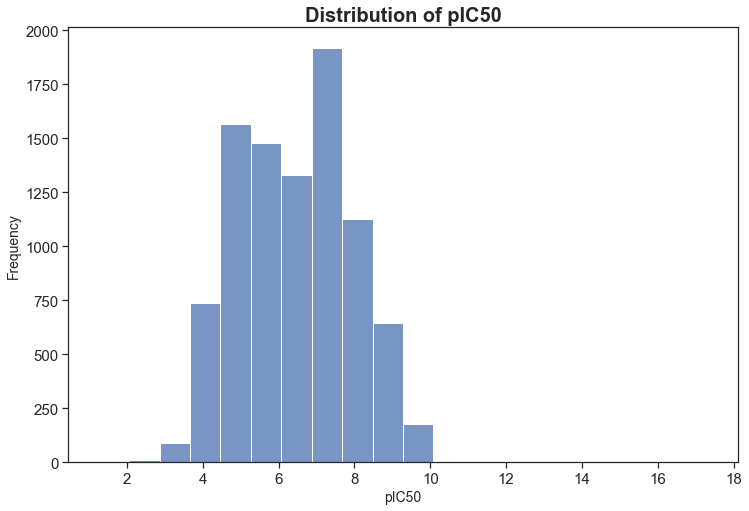

In [130]:
# distribution of the pIC50 variable using a histogram
plt.figure(figsize=(12,8))

sns.histplot(data=df_final, x="pIC50", bins=20)
plt.xlabel("pIC50", size = 14)
plt.ylabel("Frequency", size = 14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title("Distribution of pIC50", size = 20, weight = 'bold')
plt.show()


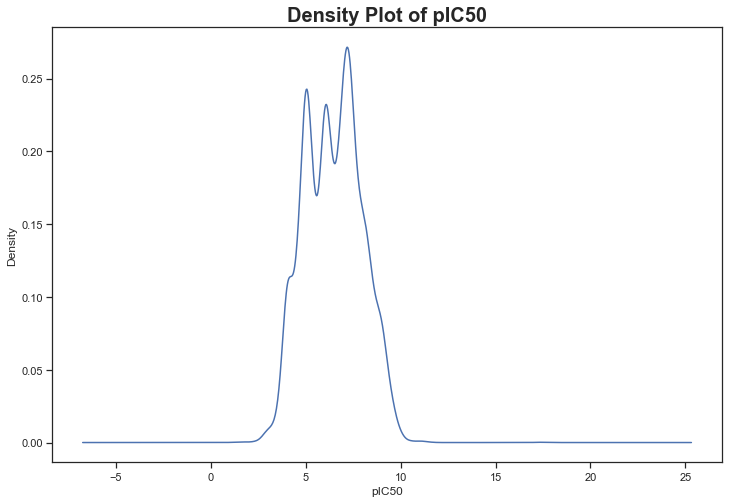

In [37]:
 #density plot to visualize the distribution
plt.figure(figsize=(12,8))

df_final["pIC50"].plot(kind="density")
plt.xlabel("pIC50")
plt.title("Density Plot of pIC50", size = 20, weight = 'bold')
plt.show()

Text(0.5, 1.0, 'Distribution: Frequency of different classes')

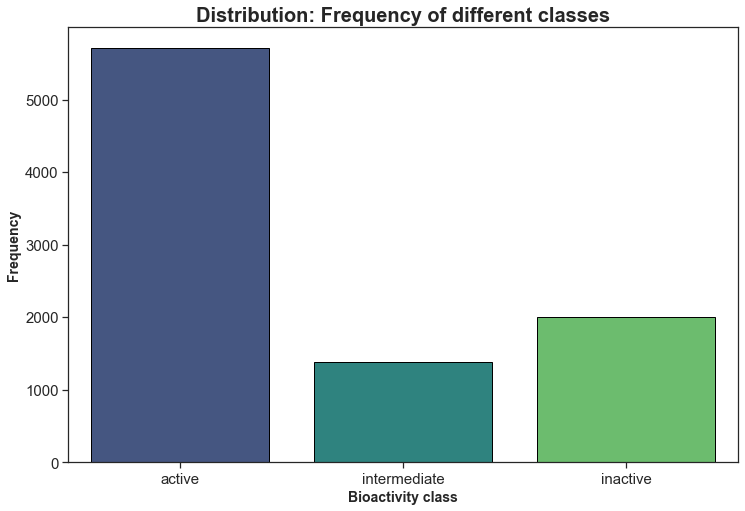

In [38]:
plt.figure(figsize=(12,8))

sns.countplot(x='class', data=df_final, edgecolor='black', palette = 'viridis')
plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')
plt.title('Distribution: Frequency of different classes', size = 20, weight='bold')

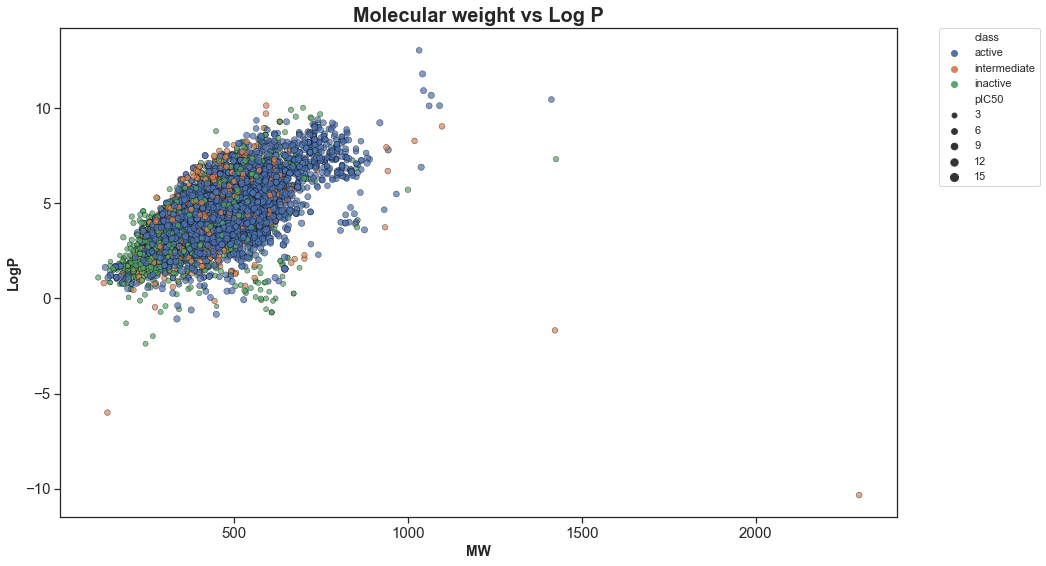

In [39]:
plt.figure(figsize=(15, 9))

sns.scatterplot(x='MW', y='LogP', data=df_final, hue='class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.title('Molecular weight vs Log P', size = 20, weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)


Text(0.5, 1.0, 'Boxplot: Bioactivity Class vs pIC50 value')

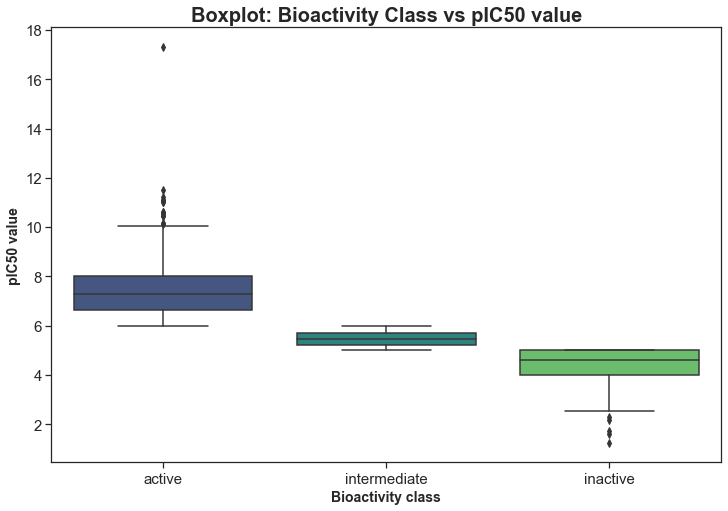

In [40]:
plt.figure(figsize=(12, 8))

sns.boxplot(x = 'class', y = 'pIC50', data = df_final, palette = 'viridis')

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')
plt.title('Boxplot: Bioactivity Class vs pIC50 value', size = 20, weight='bold')

Text(0.5, 1.0, 'Boxplot: Bioactivity Class vs Molecular Weight')

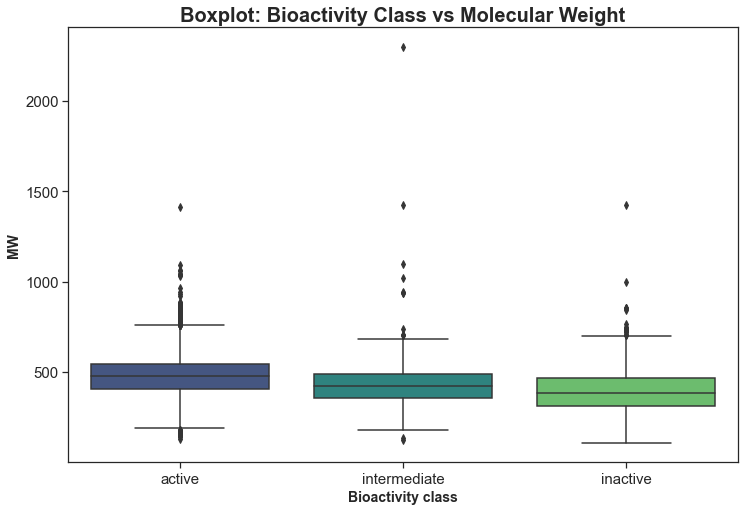

In [41]:
plt.figure(figsize=(12, 8))

sns.boxplot(x = 'class', y = 'MW', data = df_final, palette = 'viridis')

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')
plt.title('Boxplot: Bioactivity Class vs Molecular Weight', size = 20, weight='bold')

Text(0.5, 1.0, 'Boxplot: Bioactivity Class vs Log P')

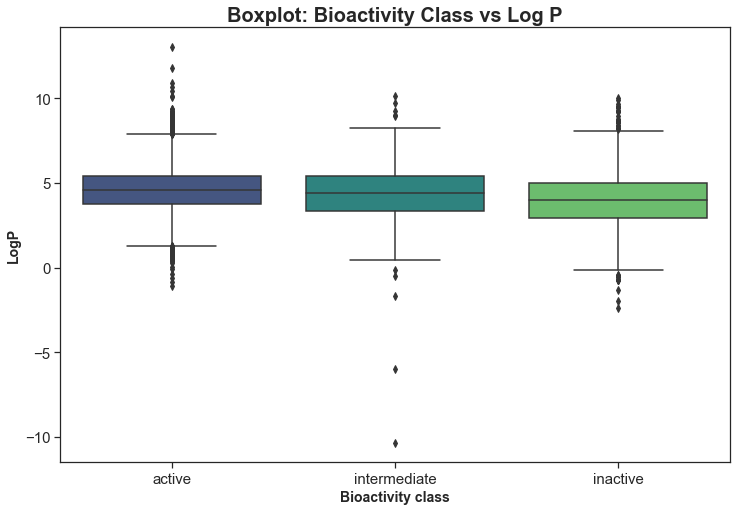

In [42]:
plt.figure(figsize=(12, 8))

sns.boxplot(x = 'class', y = 'LogP', data = df_final, palette = 'viridis')

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.title('Boxplot: Bioactivity Class vs Log P', size = 20, weight='bold')

Text(0.5, 1.0, 'Boxplot: Bioactivity Class vs H - bond Donors')

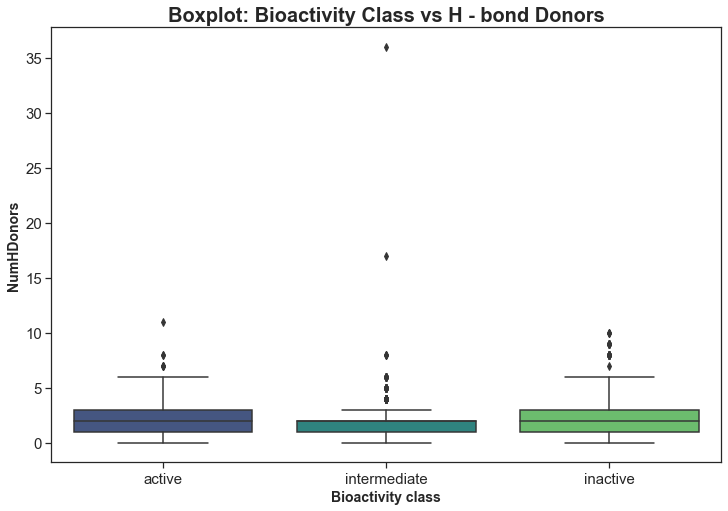

In [43]:
plt.figure(figsize=(12, 8))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_final, palette = 'viridis')

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')
plt.title('Boxplot: Bioactivity Class vs H - bond Donors', size = 20, weight='bold')

Text(0.5, 1.0, 'Boxplot: Bioactivity Class vs H-bond Acceptors')

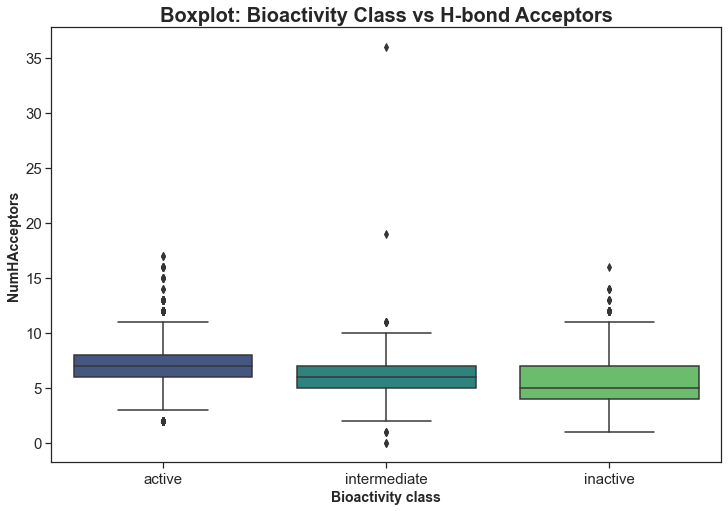

In [44]:
plt.figure(figsize=(12, 8))

sns.boxplot(x = 'class', y = 'NumHAcceptors', data = df_final, palette = 'viridis')

plt.xticks(size=15)
plt.yticks(size=15)
plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')
plt.title('Boxplot: Bioactivity Class vs H-bond Acceptors', size = 20, weight='bold')

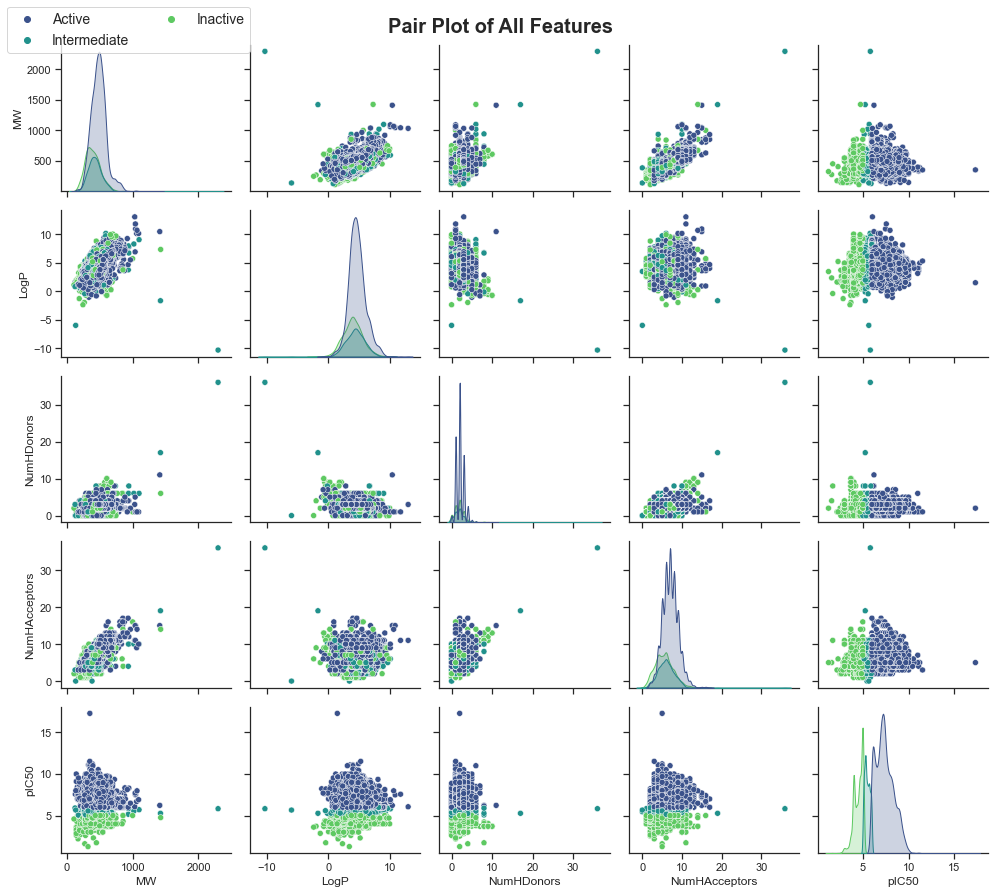

In [45]:
selection = ['class', 'MW', 'LogP', 'NumHDonors', 'NumHAcceptors', 'pIC50']

g = sns.pairplot(df_final[selection], hue='class', palette='viridis')

handles = g._legend_data.values()
labels = ['Active', 'Intermediate', 'Inactive']
g._legend.remove()
g.fig.legend(handles=handles, labels=labels, loc='upper left', ncol=2, fontsize = 14)
plt.xticks(size=15)
plt.yticks(size=15)
plt.suptitle('Pair Plot of All Features', fontsize=20, weight='bold')
plt.tight_layout()


## Pearson's Correlation

In [46]:
# Calculate the correlation matrix between pIC50 and other variables
corr_matrix = df_final.corr(method="pearson") 

# Extract the correlation coefficients between pIC50 and other variables
pIC50_corr = corr_matrix["pIC50"]

# Print the correlation coefficients in descending order
print(pIC50_corr.sort_values(ascending=False))

pIC50            1.000000
MW               0.228451
NumHAcceptors    0.221141
LogP             0.127576
NumHDonors       0.059305
Name: pIC50, dtype: float64


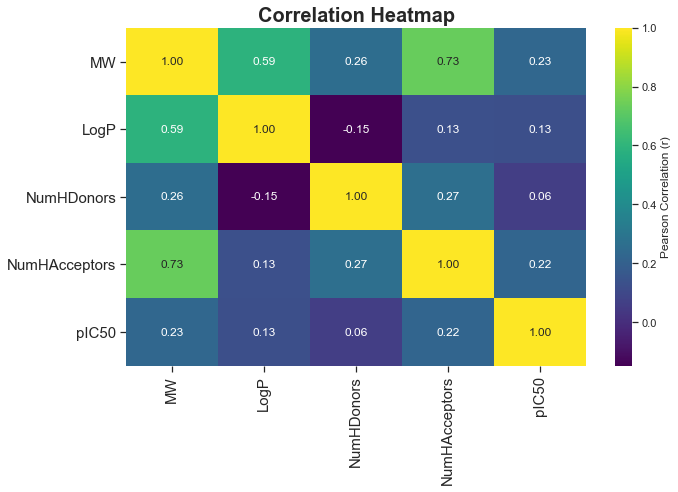

In [47]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10,7))

sns.heatmap(corr_matrix, annot=True, cmap="viridis", fmt='0.2f',cbar_kws={'label':'Pearson Correlation (r)'} )
plt.title("Correlation Heatmap", size = 20, weight = 'bold')
plt.xticks(size=15,rotation=90)
plt.yticks(size=15,rotation=0)
plt.tight_layout()
plt.show()

# Feature Engineering

## Molecular fingerprint computation to eliminate unwanted salts

In [131]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip

--2023-04-16 21:38:40--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip [following]
--2023-04-16 21:38:40--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25768637 (25M) [application/zip]
Saving to: ‘padel.zip.1’

padel.zip.1         100%[===================>]  24.57M  3.28MB/s    in 6.9s    

2023-04-16 21:38:48 (3.57 MB/s) - ‘padel.zip.1’ saved [25768637/25768637]



In [132]:
#! unzip "padel.zip"

Archive:  padel.zip
replace __MACOSX/._PaDEL-Descriptor? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [308]:
! ls -l

total 183232
-rw-r--r--@  1 athulyaanand  staff     20420 Apr  6 00:14 1.png
-rw-r--r--@  1 athulyaanand  staff     36722 Apr  6 00:14 10.png
-rw-r--r--@  1 athulyaanand  staff     23260 Apr  6 00:14 2.png
-rw-r--r--@  1 athulyaanand  staff    112748 Apr  6 00:14 3.png
-rw-r--r--@  1 athulyaanand  staff     24500 Apr  6 00:14 4.png
-rw-r--r--@  1 athulyaanand  staff     24754 Apr  6 00:14 5.png
-rw-r--r--@  1 athulyaanand  staff     22235 Apr  6 00:14 6.png
-rw-r--r--@  1 athulyaanand  staff     24460 Apr  6 00:14 7.png
-rw-r--r--@  1 athulyaanand  staff     26162 Apr  6 00:14 8.png
-rw-r--r--@  1 athulyaanand  staff    258055 Apr  6 00:14 9.png
-rw-r--r--@  1 athulyaanand  staff   1511613 Apr  5 20:11 Drug Discovery for Lung Cancer.html
-rw-r--r--   1 athulyaanand  staff   2161168 Apr 16 22:57 Drug Discovery for Lung Cancer.ipynb
drwxrwxr-x  21 athulyaanand  staff       672 May 30  2020 PaDEL-Descriptor
-rw-r--r--@  1 athulyaanand  staff      8092 Apr  6 00:14 SelfArx.cls
drwxr-xr-x  

In [309]:
df3 = pd.read_csv('acetylcholinesterase_04_bioactivity_data_3class_pIC50.csv')

In [310]:
df3.head()

,Unnamed: 0,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,0,CHEMBL68920,Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)...,active,383.814,4.45034,3.0,4.0,7.387216
1,1,CHEMBL69960,Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(N...,active,482.903,3.61432,3.0,6.0,6.769551
2,2,CHEMBL137635,CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12,intermediate,369.432,4.77200,1.0,6.0,5.031517
3,3,CHEMBL306988,CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1,inactive,283.287,2.31056,2.0,4.0,3.301030
4,4,CHEMBL66879,O=C(O)/C=C/c1ccc(O)cc1,inactive,164.160,1.49000,2.0,2.0,2.522879


In [311]:
selection = ['canonical_smiles','molecule_chembl_id']
df3_selection = df3[selection]
df3_selection.to_csv('molecule.smi', sep='\t', index=False, header=False)

In [312]:
! cat molecule.smi | head -5

Cc1cc(C)c(/C=C2\C(=O)Nc3ncnc(Nc4ccc(F)c(Cl)c4)c32)[nH]1	CHEMBL68920
Cc1cc(C(=O)N2CCOCC2)[nH]c1/C=C1\C(=O)Nc2ncnc(Nc3ccc(F)c(Cl)c3)c21	CHEMBL69960
CN(c1ccccc1)c1ncnc2ccc(N/N=N/Cc3ccccn3)cc12	CHEMBL137635
CC(=C(C#N)C#N)c1ccc(NC(=O)CCC(=O)O)cc1	CHEMBL306988
O=C(O)/C=C/c1ccc(O)cc1	CHEMBL66879
cat: stdout: Broken pipe


In [313]:
! cat molecule.smi | wc -l

    9101


In [139]:
! wget https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh

--2023-04-16 21:44:56--  https://github.com/dataprofessor/bioinformatics/raw/master/padel.sh
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh [following]
--2023-04-16 21:44:57--  https://raw.githubusercontent.com/dataprofessor/bioinformatics/master/padel.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 231 [text/plain]
Saving to: ‘padel.sh.1’

padel.sh.1          100%[===================>]     231  --.-KB/s    in 0s      

2023-04-16 21:44:57 (8.47 MB/s) - ‘padel.sh.1’ saved [231/231]



In [140]:
! cat padel.sh

java -Xms1G -Xmx1G -Djava.awt.headless=true -jar ./PaDEL-Descriptor/PaDEL-Descriptor.jar -removesalt -standardizenitro -fingerprints -descriptortypes ./PaDEL-Descriptor/PubchemFingerprinter.xml -dir ./ -file descriptors_output.csv


In [141]:
! bash padel.sh

Processing CHEMBL68920 in molecule.smi (1/9101). 
Processing CHEMBL69960 in molecule.smi (2/9101). 
Processing CHEMBL137635 in molecule.smi (3/9101). 
Processing CHEMBL306988 in molecule.smi (4/9101). 
Processing CHEMBL66879 in molecule.smi (5/9101). 
Processing CHEMBL77085 in molecule.smi (6/9101). 
Processing CHEMBL443268 in molecule.smi (7/9101). 
Processing CHEMBL76979 in molecule.smi (8/9101). 
Processing CHEMBL76589 in molecule.smi (9/9101). 
Processing CHEMBL77724 in molecule.smi (10/9101). 
Processing CHEMBL420385 in molecule.smi (11/9101). 
Processing CHEMBL76904 in molecule.smi (12/9101). 
Processing CHEMBL1009 in molecule.smi (13/9101). 
Processing CHEMBL296407 in molecule.smi (15/9101). Average speed: 1.95 s/mol.
Processing CHEMBL309625 in molecule.smi (16/9101). Average speed: 1.47 s/mol.
Processing CHEMBL304271 in molecule.smi (14/9101). Average speed: 2.92 s/mol.
Processing CHEMBL77825 in molecule.smi (17/9101). Average speed: 1.47 s/mol.
Processing CHEMBL421877 in molec

Processing CHEMBL75718 in molecule.smi (113/9101). Average speed: 0.09 s/mol.
Processing CHEMBL77298 in molecule.smi (114/9101). Average speed: 0.09 s/mol.
Processing CHEMBL432941 in molecule.smi (115/9101). Average speed: 0.09 s/mol.
Processing CHEMBL420609 in molecule.smi (116/9101). Average speed: 0.09 s/mol.
Processing CHEMBL419682 in molecule.smi (117/9101). Average speed: 0.09 s/mol.
Processing CHEMBL322395 in molecule.smi (118/9101). Average speed: 0.09 s/mol.
Processing CHEMBL88462 in molecule.smi (119/9101). Average speed: 0.09 s/mol.
Processing CHEMBL431996 in molecule.smi (120/9101). Average speed: 0.09 s/mol.
Processing CHEMBL91250 in molecule.smi (121/9101). Average speed: 0.09 s/mol.
Processing CHEMBL88771 in molecule.smi (122/9101). Average speed: 0.09 s/mol.
Processing CHEMBL91815 in molecule.smi (123/9101). Average speed: 0.09 s/mol.
Processing CHEMBL328029 in molecule.smi (124/9101). Average speed: 0.09 s/mol.
Processing CHEMBL314995 in molecule.smi (125/9101). Averag

Processing CHEMBL136102 in molecule.smi (218/9101). Average speed: 0.07 s/mol.
Processing CHEMBL336264 in molecule.smi (219/9101). Average speed: 0.07 s/mol.
Processing CHEMBL104153 in molecule.smi (220/9101). Average speed: 0.07 s/mol.
Processing CHEMBL53156 in molecule.smi (221/9101). Average speed: 0.07 s/mol.
Processing CHEMBL95774 in molecule.smi (222/9101). Average speed: 0.07 s/mol.
Processing CHEMBL130893 in molecule.smi (223/9101). Average speed: 0.07 s/mol.
Processing CHEMBL129907 in molecule.smi (224/9101). Average speed: 0.07 s/mol.
Processing CHEMBL131653 in molecule.smi (225/9101). Average speed: 0.07 s/mol.
Processing CHEMBL268868 in molecule.smi (226/9101). Average speed: 0.07 s/mol.
Processing CHEMBL7352 in molecule.smi (227/9101). Average speed: 0.07 s/mol.
Processing CHEMBL7775 in molecule.smi (228/9101). Average speed: 0.07 s/mol.
Processing CHEMBL8222 in molecule.smi (229/9101). Average speed: 0.07 s/mol.
Processing CHEMBL60200 in molecule.smi (230/9101). Average s

Processing CHEMBL287007 in molecule.smi (323/9101). Average speed: 0.07 s/mol.
Processing CHEMBL37346 in molecule.smi (324/9101). Average speed: 0.07 s/mol.
Processing CHEMBL39563 in molecule.smi (325/9101). Average speed: 0.07 s/mol.
Processing CHEMBL15346 in molecule.smi (326/9101). Average speed: 0.07 s/mol.
Processing CHEMBL15202 in molecule.smi (327/9101). Average speed: 0.07 s/mol.
Processing CHEMBL554 in molecule.smi (328/9101). Average speed: 0.07 s/mol.
Processing CHEMBL36819 in molecule.smi (329/9101). Average speed: 0.07 s/mol.
Processing CHEMBL40130 in molecule.smi (330/9101). Average speed: 0.07 s/mol.
Processing CHEMBL35820 in molecule.smi (331/9101). Average speed: 0.07 s/mol.
Processing CHEMBL14627 in molecule.smi (332/9101). Average speed: 0.07 s/mol.
Processing CHEMBL290096 in molecule.smi (333/9101). Average speed: 0.07 s/mol.
Processing CHEMBL289787 in molecule.smi (334/9101). Average speed: 0.07 s/mol.
Processing CHEMBL45564 in molecule.smi (335/9101). Average spee

Processing CHEMBL333454 in molecule.smi (428/9101). Average speed: 0.07 s/mol.
Processing CHEMBL122522 in molecule.smi (429/9101). Average speed: 0.07 s/mol.
Processing CHEMBL56219 in molecule.smi (430/9101). Average speed: 0.07 s/mol.
Processing CHEMBL118205 in molecule.smi (431/9101). Average speed: 0.07 s/mol.
Processing CHEMBL2448064 in molecule.smi (432/9101). Average speed: 0.07 s/mol.
Processing CHEMBL308879 in molecule.smi (433/9101). Average speed: 0.07 s/mol.
Processing CHEMBL417740 in molecule.smi (434/9101). Average speed: 0.07 s/mol.
Processing CHEMBL70130 in molecule.smi (435/9101). Average speed: 0.07 s/mol.
Processing CHEMBL66107 in molecule.smi (436/9101). Average speed: 0.07 s/mol.
Processing CHEMBL25579 in molecule.smi (437/9101). Average speed: 0.07 s/mol.
Processing CHEMBL24026 in molecule.smi (438/9101). Average speed: 0.07 s/mol.
Processing CHEMBL66705 in molecule.smi (439/9101). Average speed: 0.07 s/mol.
Processing CHEMBL116595 in molecule.smi (440/9101). Avera

Processing CHEMBL66612 in molecule.smi (536/9101). Average speed: 0.06 s/mol.
Processing CHEMBL66502 in molecule.smi (537/9101). Average speed: 0.06 s/mol.
Processing CHEMBL66101 in molecule.smi (538/9101). Average speed: 0.06 s/mol.
Processing CHEMBL66329 in molecule.smi (539/9101). Average speed: 0.06 s/mol.
Processing CHEMBL67702 in molecule.smi (540/9101). Average speed: 0.06 s/mol.
Processing CHEMBL304310 in molecule.smi (541/9101). Average speed: 0.06 s/mol.
Processing CHEMBL59145 in molecule.smi (542/9101). Average speed: 0.06 s/mol.
Processing CHEMBL118109 in molecule.smi (543/9101). Average speed: 0.06 s/mol.
Processing CHEMBL343875 in molecule.smi (544/9101). Average speed: 0.06 s/mol.
Processing CHEMBL334973 in molecule.smi (545/9101). Average speed: 0.06 s/mol.
Processing CHEMBL66008 in molecule.smi (546/9101). Average speed: 0.06 s/mol.
Processing CHEMBL135241 in molecule.smi (548/9101). Average speed: 0.06 s/mol.
Processing CHEMBL279459 in molecule.smi (547/9101). Average

Processing CHEMBL157128 in molecule.smi (641/9101). Average speed: 0.06 s/mol.
Processing CHEMBL116853 in molecule.smi (642/9101). Average speed: 0.06 s/mol.
Processing CHEMBL114728 in molecule.smi (643/9101). Average speed: 0.06 s/mol.
Processing CHEMBL326811 in molecule.smi (644/9101). Average speed: 0.06 s/mol.
Processing CHEMBL53428 in molecule.smi (645/9101). Average speed: 0.06 s/mol.
Processing CHEMBL125568 in molecule.smi (646/9101). Average speed: 0.06 s/mol.
Processing CHEMBL129824 in molecule.smi (647/9101). Average speed: 0.06 s/mol.
Processing CHEMBL114073 in molecule.smi (648/9101). Average speed: 0.06 s/mol.
Processing CHEMBL128432 in molecule.smi (649/9101). Average speed: 0.06 s/mol.
Processing CHEMBL116525 in molecule.smi (651/9101). Average speed: 0.06 s/mol.
Processing CHEMBL79704 in molecule.smi (650/9101). Average speed: 0.06 s/mol.
Processing CHEMBL323630 in molecule.smi (652/9101). Average speed: 0.06 s/mol.
Processing CHEMBL312247 in molecule.smi (653/9101). Av

Processing CHEMBL554983 in molecule.smi (745/9101). Average speed: 0.06 s/mol.
Processing CHEMBL358934 in molecule.smi (746/9101). Average speed: 0.06 s/mol.
Processing CHEMBL355191 in molecule.smi (747/9101). Average speed: 0.06 s/mol.
Processing CHEMBL540590 in molecule.smi (748/9101). Average speed: 0.06 s/mol.
Processing CHEMBL544865 in molecule.smi (749/9101). Average speed: 0.06 s/mol.
Processing CHEMBL66031 in molecule.smi (750/9101). Average speed: 0.06 s/mol.
Processing CHEMBL555921 in molecule.smi (751/9101). Average speed: 0.06 s/mol.
Processing CHEMBL327300 in molecule.smi (752/9101). Average speed: 0.06 s/mol.
Processing CHEMBL171311 in molecule.smi (753/9101). Average speed: 0.06 s/mol.
Processing CHEMBL166766 in molecule.smi (754/9101). Average speed: 0.06 s/mol.
Processing CHEMBL155100 in molecule.smi (755/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2094036 in molecule.smi (756/9101). Average speed: 0.06 s/mol.
Processing CHEMBL169780 in molecule.smi (757/9101). 

Processing CHEMBL332173 in molecule.smi (849/9101). Average speed: 0.06 s/mol.
Processing CHEMBL57990 in molecule.smi (850/9101). Average speed: 0.06 s/mol.
Processing CHEMBL331792 in molecule.smi (851/9101). Average speed: 0.06 s/mol.
Processing CHEMBL125983 in molecule.smi (852/9101). Average speed: 0.06 s/mol.
Processing CHEMBL333045 in molecule.smi (853/9101). Average speed: 0.06 s/mol.
Processing CHEMBL122081 in molecule.smi (855/9101). Average speed: 0.06 s/mol.
Processing CHEMBL55794 in molecule.smi (854/9101). Average speed: 0.06 s/mol.
Processing CHEMBL294395 in molecule.smi (856/9101). Average speed: 0.06 s/mol.
Processing CHEMBL323660 in molecule.smi (857/9101). Average speed: 0.06 s/mol.
Processing CHEMBL338625 in molecule.smi (858/9101). Average speed: 0.06 s/mol.
Processing CHEMBL332879 in molecule.smi (860/9101). Average speed: 0.06 s/mol.
Processing CHEMBL419601 in molecule.smi (859/9101). Average speed: 0.06 s/mol.
Processing CHEMBL339684 in molecule.smi (861/9101). Av

Processing CHEMBL538757 in molecule.smi (957/9101). Average speed: 0.06 s/mol.
Processing CHEMBL350882 in molecule.smi (958/9101). Average speed: 0.06 s/mol.
Processing CHEMBL348146 in molecule.smi (956/9101). Average speed: 0.06 s/mol.
Processing CHEMBL422531 in molecule.smi (959/9101). Average speed: 0.06 s/mol.
Processing CHEMBL538507 in molecule.smi (960/9101). Average speed: 0.06 s/mol.
Processing CHEMBL154969 in molecule.smi (961/9101). Average speed: 0.06 s/mol.
Processing CHEMBL552859 in molecule.smi (962/9101). Average speed: 0.06 s/mol.
Processing CHEMBL414013 in molecule.smi (963/9101). Average speed: 0.06 s/mol.
Processing CHEMBL544074 in molecule.smi (964/9101). Average speed: 0.06 s/mol.
Processing CHEMBL154260 in molecule.smi (965/9101). Average speed: 0.06 s/mol.
Processing CHEMBL346716 in molecule.smi (966/9101). Average speed: 0.06 s/mol.
Processing CHEMBL545006 in molecule.smi (967/9101). Average speed: 0.06 s/mol.
Processing CHEMBL542891 in molecule.smi (968/9101). 

Processing CHEMBL418909 in molecule.smi (1061/9101). Average speed: 0.06 s/mol.
Processing CHEMBL78685 in molecule.smi (1062/9101). Average speed: 0.06 s/mol.
Processing CHEMBL77452 in molecule.smi (1063/9101). Average speed: 0.06 s/mol.
Processing CHEMBL46946 in molecule.smi (1064/9101). Average speed: 0.06 s/mol.
Processing CHEMBL442749 in molecule.smi (1065/9101). Average speed: 0.06 s/mol.
Processing CHEMBL80164 in molecule.smi (1066/9101). Average speed: 0.06 s/mol.
Processing CHEMBL174634 in molecule.smi (1068/9101). Average speed: 0.06 s/mol.
Processing CHEMBL80734 in molecule.smi (1067/9101). Average speed: 0.06 s/mol.
Processing CHEMBL429057 in molecule.smi (1069/9101). Average speed: 0.06 s/mol.
Processing CHEMBL268731 in molecule.smi (1070/9101). Average speed: 0.06 s/mol.
Processing CHEMBL176702 in molecule.smi (1071/9101). Average speed: 0.06 s/mol.
Processing CHEMBL161956 in molecule.smi (1072/9101). Average speed: 0.06 s/mol.
Processing CHEMBL367442 in molecule.smi (1073

Processing CHEMBL286343 in molecule.smi (1165/9101). Average speed: 0.06 s/mol.
Processing CHEMBL27685 in molecule.smi (1166/9101). Average speed: 0.06 s/mol.
Processing CHEMBL31630 in molecule.smi (1167/9101). Average speed: 0.06 s/mol.
Processing CHEMBL27688 in molecule.smi (1168/9101). Average speed: 0.06 s/mol.
Processing CHEMBL31373 in molecule.smi (1169/9101). Average speed: 0.06 s/mol.
Processing CHEMBL31816 in molecule.smi (1170/9101). Average speed: 0.06 s/mol.
Processing CHEMBL417478 in molecule.smi (1171/9101). Average speed: 0.05 s/mol.
Processing CHEMBL31588 in molecule.smi (1173/9101). Average speed: 0.06 s/mol.
Processing CHEMBL32844 in molecule.smi (1172/9101). Average speed: 0.06 s/mol.
Processing CHEMBL31656 in molecule.smi (1174/9101). Average speed: 0.06 s/mol.
Processing CHEMBL31419 in molecule.smi (1175/9101). Average speed: 0.06 s/mol.
Processing CHEMBL31326 in molecule.smi (1176/9101). Average speed: 0.06 s/mol.
Processing CHEMBL31815 in molecule.smi (1177/9101)

Processing CHEMBL277430 in molecule.smi (1270/9101). Average speed: 0.05 s/mol.
Processing CHEMBL51741 in molecule.smi (1268/9101). Average speed: 0.05 s/mol.
Processing CHEMBL313433 in molecule.smi (1269/9101). Average speed: 0.05 s/mol.
Processing CHEMBL21215 in molecule.smi (1271/9101). Average speed: 0.05 s/mol.
Processing CHEMBL347256 in molecule.smi (1272/9101). Average speed: 0.05 s/mol.
Processing CHEMBL325245 in molecule.smi (1273/9101). Average speed: 0.05 s/mol.
Processing CHEMBL422540 in molecule.smi (1274/9101). Average speed: 0.05 s/mol.
Processing CHEMBL315701 in molecule.smi (1275/9101). Average speed: 0.05 s/mol.
Processing CHEMBL277931 in molecule.smi (1276/9101). Average speed: 0.05 s/mol.
Processing CHEMBL435054 in molecule.smi (1277/9101). Average speed: 0.05 s/mol.
Processing CHEMBL345211 in molecule.smi (1278/9101). Average speed: 0.05 s/mol.
Processing CHEMBL345622 in molecule.smi (1279/9101). Average speed: 0.05 s/mol.
Processing CHEMBL117804 in molecule.smi (1

Processing CHEMBL418279 in molecule.smi (1371/9101). Average speed: 0.05 s/mol.
Processing CHEMBL55683 in molecule.smi (1372/9101). Average speed: 0.05 s/mol.
Processing CHEMBL21265 in molecule.smi (1373/9101). Average speed: 0.05 s/mol.
Processing CHEMBL278526 in molecule.smi (1374/9101). Average speed: 0.05 s/mol.
Processing CHEMBL59099 in molecule.smi (1375/9101). Average speed: 0.05 s/mol.
Processing CHEMBL279035 in molecule.smi (1376/9101). Average speed: 0.05 s/mol.
Processing CHEMBL21096 in molecule.smi (1377/9101). Average speed: 0.05 s/mol.
Processing CHEMBL279481 in molecule.smi (1378/9101). Average speed: 0.05 s/mol.
Processing CHEMBL21108 in molecule.smi (1379/9101). Average speed: 0.05 s/mol.
Processing CHEMBL282436 in molecule.smi (1380/9101). Average speed: 0.05 s/mol.
Processing CHEMBL283766 in molecule.smi (1381/9101). Average speed: 0.05 s/mol.
Processing CHEMBL56669 in molecule.smi (1382/9101). Average speed: 0.05 s/mol.
Processing CHEMBL277039 in molecule.smi (1383/

Processing CHEMBL96489 in molecule.smi (1476/9101). Average speed: 0.05 s/mol.
Processing CHEMBL94432 in molecule.smi (1475/9101). Average speed: 0.05 s/mol.
Processing CHEMBL93544 in molecule.smi (1478/9101). Average speed: 0.05 s/mol.
Processing CHEMBL93545 in molecule.smi (1477/9101). Average speed: 0.05 s/mol.
Processing CHEMBL93295 in molecule.smi (1479/9101). Average speed: 0.05 s/mol.
Processing CHEMBL328691 in molecule.smi (1481/9101). Average speed: 0.05 s/mol.
Processing CHEMBL96065 in molecule.smi (1480/9101). Average speed: 0.05 s/mol.
Processing CHEMBL92709 in molecule.smi (1482/9101). Average speed: 0.05 s/mol.
Processing CHEMBL65038 in molecule.smi (1483/9101). Average speed: 0.05 s/mol.
Processing CHEMBL317925 in molecule.smi (1485/9101). Average speed: 0.05 s/mol.
Processing CHEMBL93346 in molecule.smi (1484/9101). Average speed: 0.05 s/mol.
Processing CHEMBL92398 in molecule.smi (1486/9101). Average speed: 0.05 s/mol.
Processing CHEMBL327307 in molecule.smi (1488/9101

Processing CHEMBL291496 in molecule.smi (1579/9101). Average speed: 0.05 s/mol.
Processing CHEMBL553523 in molecule.smi (1580/9101). Average speed: 0.05 s/mol.
Processing CHEMBL335052 in molecule.smi (1581/9101). Average speed: 0.05 s/mol.
Processing CHEMBL168343 in molecule.smi (1582/9101). Average speed: 0.05 s/mol.
Processing CHEMBL52418 in molecule.smi (1583/9101). Average speed: 0.05 s/mol.
Processing CHEMBL134439 in molecule.smi (1584/9101). Average speed: 0.05 s/mol.
Processing CHEMBL352876 in molecule.smi (1585/9101). Average speed: 0.05 s/mol.
Processing CHEMBL54784 in molecule.smi (1586/9101). Average speed: 0.05 s/mol.
Processing CHEMBL54474 in molecule.smi (1588/9101). Average speed: 0.05 s/mol.
Processing CHEMBL296377 in molecule.smi (1587/9101). Average speed: 0.05 s/mol.
Processing CHEMBL355853 in molecule.smi (1589/9101). Average speed: 0.05 s/mol.
Processing CHEMBL172333 in molecule.smi (1590/9101). Average speed: 0.05 s/mol.
Processing CHEMBL51320 in molecule.smi (159

Processing CHEMBL50977 in molecule.smi (1683/9101). Average speed: 0.05 s/mol.
Processing CHEMBL51573 in molecule.smi (1684/9101). Average speed: 0.05 s/mol.
Processing CHEMBL122243 in molecule.smi (1685/9101). Average speed: 0.05 s/mol.
Processing CHEMBL49120 in molecule.smi (1687/9101). Average speed: 0.05 s/mol.
Processing CHEMBL122245 in molecule.smi (1686/9101). Average speed: 0.05 s/mol.
Processing CHEMBL153843 in molecule.smi (1688/9101). Average speed: 0.05 s/mol.
Processing CHEMBL332765 in molecule.smi (1690/9101). Average speed: 0.05 s/mol.
Processing CHEMBL294213 in molecule.smi (1689/9101). Average speed: 0.05 s/mol.
Processing CHEMBL306081 in molecule.smi (1691/9101). Average speed: 0.05 s/mol.
Processing CHEMBL291313 in molecule.smi (1692/9101). Average speed: 0.05 s/mol.
Processing CHEMBL51028 in molecule.smi (1693/9101). Average speed: 0.05 s/mol.
Processing CHEMBL51485 in molecule.smi (1694/9101). Average speed: 0.05 s/mol.
Processing CHEMBL294681 in molecule.smi (1695

Processing CHEMBL73710 in molecule.smi (1788/9101). Average speed: 0.05 s/mol.
Processing CHEMBL73625 in molecule.smi (1789/9101). Average speed: 0.05 s/mol.
Processing CHEMBL72322 in molecule.smi (1791/9101). Average speed: 0.05 s/mol.
Processing CHEMBL310923 in molecule.smi (1790/9101). Average speed: 0.05 s/mol.
Processing CHEMBL431001 in molecule.smi (1792/9101). Average speed: 0.05 s/mol.
Processing CHEMBL75049 in molecule.smi (1793/9101). Average speed: 0.05 s/mol.
Processing CHEMBL309937 in molecule.smi (1794/9101). Average speed: 0.05 s/mol.
Processing CHEMBL72984 in molecule.smi (1795/9101). Average speed: 0.05 s/mol.
Processing CHEMBL76116 in molecule.smi (1797/9101). Average speed: 0.05 s/mol.
Processing CHEMBL74722 in molecule.smi (1796/9101). Average speed: 0.05 s/mol.
Processing CHEMBL307026 in molecule.smi (1798/9101). Average speed: 0.05 s/mol.
Processing CHEMBL72560 in molecule.smi (1799/9101). Average speed: 0.05 s/mol.
Processing CHEMBL308582 in molecule.smi (1800/91

Processing CHEMBL182254 in molecule.smi (1891/9101). Average speed: 0.05 s/mol.
Processing CHEMBL181742 in molecule.smi (1892/9101). Average speed: 0.05 s/mol.
Processing CHEMBL368891 in molecule.smi (1893/9101). Average speed: 0.05 s/mol.
Processing CHEMBL361322 in molecule.smi (1894/9101). Average speed: 0.05 s/mol.
Processing CHEMBL181617 in molecule.smi (1895/9101). Average speed: 0.05 s/mol.
Processing CHEMBL179451 in molecule.smi (1896/9101). Average speed: 0.05 s/mol.
Processing CHEMBL186802 in molecule.smi (1897/9101). Average speed: 0.05 s/mol.
Processing CHEMBL186580 in molecule.smi (1898/9101). Average speed: 0.05 s/mol.
Processing CHEMBL185327 in molecule.smi (1899/9101). Average speed: 0.05 s/mol.
Processing CHEMBL184555 in molecule.smi (1900/9101). Average speed: 0.05 s/mol.
Processing CHEMBL186747 in molecule.smi (1901/9101). Average speed: 0.05 s/mol.
Processing CHEMBL182397 in molecule.smi (1902/9101). Average speed: 0.05 s/mol.
Processing CHEMBL360209 in molecule.smi 

Processing CHEMBL202244 in molecule.smi (1994/9101). Average speed: 0.05 s/mol.
Processing CHEMBL383030 in molecule.smi (1995/9101). Average speed: 0.05 s/mol.
Processing CHEMBL202162 in molecule.smi (1996/9101). Average speed: 0.05 s/mol.
Processing CHEMBL201865 in molecule.smi (1997/9101). Average speed: 0.05 s/mol.
Processing CHEMBL202216 in molecule.smi (1998/9101). Average speed: 0.05 s/mol.
Processing CHEMBL201307 in molecule.smi (1999/9101). Average speed: 0.05 s/mol.
Processing CHEMBL437890 in molecule.smi (2000/9101). Average speed: 0.05 s/mol.
Processing CHEMBL203599 in molecule.smi (2001/9101). Average speed: 0.05 s/mol.
Processing CHEMBL205059 in molecule.smi (2002/9101). Average speed: 0.05 s/mol.
Processing CHEMBL204638 in molecule.smi (2003/9101). Average speed: 0.05 s/mol.
Processing CHEMBL203661 in molecule.smi (2004/9101). Average speed: 0.05 s/mol.
Processing CHEMBL202556 in molecule.smi (2005/9101). Average speed: 0.05 s/mol.
Processing CHEMBL202421 in molecule.smi 

Processing CHEMBL425601 in molecule.smi (2098/9101). Average speed: 0.05 s/mol.
Processing CHEMBL207815 in molecule.smi (2097/9101). Average speed: 0.05 s/mol.
Processing CHEMBL207718 in molecule.smi (2099/9101). Average speed: 0.05 s/mol.
Processing CHEMBL383246 in molecule.smi (2100/9101). Average speed: 0.05 s/mol.
Processing CHEMBL380889 in molecule.smi (2102/9101). Average speed: 0.05 s/mol.
Processing CHEMBL207130 in molecule.smi (2101/9101). Average speed: 0.05 s/mol.
Processing CHEMBL207445 in molecule.smi (2103/9101). Average speed: 0.05 s/mol.
Processing CHEMBL208286 in molecule.smi (2105/9101). Average speed: 0.05 s/mol.
Processing CHEMBL379905 in molecule.smi (2104/9101). Average speed: 0.05 s/mol.
Processing CHEMBL376967 in molecule.smi (2106/9101). Average speed: 0.05 s/mol.
Processing CHEMBL382823 in molecule.smi (2107/9101). Average speed: 0.05 s/mol.
Processing CHEMBL208048 in molecule.smi (2108/9101). Average speed: 0.05 s/mol.
Processing CHEMBL378370 in molecule.smi 

Processing CHEMBL213616 in molecule.smi (2201/9101). Average speed: 0.05 s/mol.
Processing CHEMBL214863 in molecule.smi (2202/9101). Average speed: 0.05 s/mol.
Processing CHEMBL386296 in molecule.smi (2203/9101). Average speed: 0.05 s/mol.
Processing CHEMBL386579 in molecule.smi (2204/9101). Average speed: 0.05 s/mol.
Processing CHEMBL214744 in molecule.smi (2205/9101). Average speed: 0.05 s/mol.
Processing CHEMBL383999 in molecule.smi (2206/9101). Average speed: 0.05 s/mol.
Processing CHEMBL425083 in molecule.smi (2207/9101). Average speed: 0.05 s/mol.
Processing CHEMBL425074 in molecule.smi (2208/9101). Average speed: 0.05 s/mol.
Processing CHEMBL215280 in molecule.smi (2209/9101). Average speed: 0.05 s/mol.
Processing CHEMBL211982 in molecule.smi (2210/9101). Average speed: 0.05 s/mol.
Processing CHEMBL385425 in molecule.smi (2211/9101). Average speed: 0.05 s/mol.
Processing CHEMBL215365 in molecule.smi (2213/9101). Average speed: 0.05 s/mol.
Processing CHEMBL214999 in molecule.smi 

Processing CHEMBL233324 in molecule.smi (2305/9101). Average speed: 0.05 s/mol.
Processing CHEMBL400413 in molecule.smi (2306/9101). Average speed: 0.05 s/mol.
Processing CHEMBL234577 in molecule.smi (2307/9101). Average speed: 0.05 s/mol.
Processing CHEMBL392273 in molecule.smi (2308/9101). Average speed: 0.05 s/mol.
Processing CHEMBL231885 in molecule.smi (2309/9101). Average speed: 0.05 s/mol.
Processing CHEMBL265629 in molecule.smi (2310/9101). Average speed: 0.05 s/mol.
Processing CHEMBL232082 in molecule.smi (2311/9101). Average speed: 0.05 s/mol.
Processing CHEMBL231875 in molecule.smi (2312/9101). Average speed: 0.05 s/mol.
Processing CHEMBL398388 in molecule.smi (2313/9101). Average speed: 0.05 s/mol.
Processing CHEMBL231663 in molecule.smi (2314/9101). Average speed: 0.05 s/mol.
Processing CHEMBL234772 in molecule.smi (2315/9101). Average speed: 0.05 s/mol.
Processing CHEMBL401443 in molecule.smi (2316/9101). Average speed: 0.05 s/mol.
Processing CHEMBL391675 in molecule.smi 

Processing CHEMBL399373 in molecule.smi (2409/9101). Average speed: 0.05 s/mol.
Processing CHEMBL251314 in molecule.smi (2410/9101). Average speed: 0.05 s/mol.
Processing CHEMBL251125 in molecule.smi (2411/9101). Average speed: 0.05 s/mol.
Processing CHEMBL399372 in molecule.smi (2412/9101). Average speed: 0.05 s/mol.
Processing CHEMBL251124 in molecule.smi (2413/9101). Average speed: 0.05 s/mol.
Processing CHEMBL251123 in molecule.smi (2414/9101). Average speed: 0.05 s/mol.
Processing CHEMBL399371 in molecule.smi (2415/9101). Average speed: 0.05 s/mol.
Processing CHEMBL250925 in molecule.smi (2416/9101). Average speed: 0.05 s/mol.
Processing CHEMBL250924 in molecule.smi (2417/9101). Average speed: 0.05 s/mol.
Processing CHEMBL250923 in molecule.smi (2418/9101). Average speed: 0.05 s/mol.
Processing CHEMBL3085381 in molecule.smi (2419/9101). Average speed: 0.05 s/mol.
Processing CHEMBL3085380 in molecule.smi (2420/9101). Average speed: 0.05 s/mol.
Processing CHEMBL3085379 in molecule.s

Processing CHEMBL270696 in molecule.smi (2513/9101). Average speed: 0.05 s/mol.
Processing CHEMBL271328 in molecule.smi (2514/9101). Average speed: 0.05 s/mol.
Processing CHEMBL405772 in molecule.smi (2515/9101). Average speed: 0.05 s/mol.
Processing CHEMBL402452 in molecule.smi (2516/9101). Average speed: 0.05 s/mol.
Processing CHEMBL270975 in molecule.smi (2517/9101). Average speed: 0.05 s/mol.
Processing CHEMBL270924 in molecule.smi (2518/9101). Average speed: 0.05 s/mol.
Processing CHEMBL271540 in molecule.smi (2519/9101). Average speed: 0.05 s/mol.
Processing CHEMBL406236 in molecule.smi (2520/9101). Average speed: 0.05 s/mol.
Processing CHEMBL407591 in molecule.smi (2521/9101). Average speed: 0.05 s/mol.
Processing CHEMBL441335 in molecule.smi (2522/9101). Average speed: 0.05 s/mol.
Processing CHEMBL408105 in molecule.smi (2523/9101). Average speed: 0.05 s/mol.
Processing CHEMBL408351 in molecule.smi (2524/9101). Average speed: 0.05 s/mol.
Processing CHEMBL271617 in molecule.smi 

Processing CHEMBL490987 in molecule.smi (2617/9101). Average speed: 0.05 s/mol.
Processing CHEMBL520493 in molecule.smi (2618/9101). Average speed: 0.05 s/mol.
Processing CHEMBL490577 in molecule.smi (2619/9101). Average speed: 0.05 s/mol.
Processing CHEMBL454002 in molecule.smi (2620/9101). Average speed: 0.05 s/mol.
Processing CHEMBL474267 in molecule.smi (2621/9101). Average speed: 0.05 s/mol.
Processing CHEMBL483830 in molecule.smi (2622/9101). Average speed: 0.05 s/mol.
Processing CHEMBL242741 in molecule.smi (2623/9101). Average speed: 0.05 s/mol.
Processing CHEMBL488101 in molecule.smi (2624/9101). Average speed: 0.05 s/mol.
Processing CHEMBL490774 in molecule.smi (2625/9101). Average speed: 0.05 s/mol.
Processing CHEMBL501368 in molecule.smi (2626/9101). Average speed: 0.05 s/mol.
Processing CHEMBL483831 in molecule.smi (2627/9101). Average speed: 0.05 s/mol.
Processing CHEMBL492199 in molecule.smi (2628/9101). Average speed: 0.05 s/mol.
Processing CHEMBL28 in molecule.smi (262

Processing CHEMBL503253 in molecule.smi (2721/9101). Average speed: 0.05 s/mol.
Processing CHEMBL451074 in molecule.smi (2722/9101). Average speed: 0.05 s/mol.
Processing CHEMBL500217 in molecule.smi (2723/9101). Average speed: 0.05 s/mol.
Processing CHEMBL447720 in molecule.smi (2724/9101). Average speed: 0.05 s/mol.
Processing CHEMBL451347 in molecule.smi (2725/9101). Average speed: 0.05 s/mol.
Processing CHEMBL452768 in molecule.smi (2727/9101). Average speed: 0.05 s/mol.
Processing CHEMBL452980 in molecule.smi (2726/9101). Average speed: 0.05 s/mol.
Processing CHEMBL453398 in molecule.smi (2728/9101). Average speed: 0.05 s/mol.
Processing CHEMBL490555 in molecule.smi (2729/9101). Average speed: 0.05 s/mol.
Processing CHEMBL473761 in molecule.smi (2730/9101). Average speed: 0.05 s/mol.
Processing CHEMBL514941 in molecule.smi (2731/9101). Average speed: 0.05 s/mol.
Processing CHEMBL473354 in molecule.smi (2732/9101). Average speed: 0.05 s/mol.
Processing CHEMBL473557 in molecule.smi 

Processing CHEMBL179224 in molecule.smi (2824/9101). Average speed: 0.05 s/mol.
Processing CHEMBL359830 in molecule.smi (2825/9101). Average speed: 0.06 s/mol.
Processing CHEMBL454383 in molecule.smi (2826/9101). Average speed: 0.05 s/mol.
Processing CHEMBL510155 in molecule.smi (2827/9101). Average speed: 0.05 s/mol.
Processing CHEMBL510357 in molecule.smi (2828/9101). Average speed: 0.05 s/mol.
Processing CHEMBL473747 in molecule.smi (2830/9101). Average speed: 0.06 s/mol.
Processing CHEMBL516365 in molecule.smi (2829/9101). Average speed: 0.05 s/mol.
Processing CHEMBL491676 in molecule.smi (2833/9101). Average speed: 0.05 s/mol.
Processing CHEMBL473944 in molecule.smi (2832/9101). Average speed: 0.05 s/mol.
Processing CHEMBL473748 in molecule.smi (2831/9101). Average speed: 0.05 s/mol.
Processing CHEMBL522134 in molecule.smi (2834/9101). Average speed: 0.05 s/mol.
Processing CHEMBL492077 in molecule.smi (2835/9101). Average speed: 0.05 s/mol.
Processing CHEMBL489111 in molecule.smi 

Processing CHEMBL513208 in molecule.smi (2927/9101). Average speed: 0.05 s/mol.
Processing CHEMBL511637 in molecule.smi (2928/9101). Average speed: 0.05 s/mol.
Processing CHEMBL470218 in molecule.smi (2929/9101). Average speed: 0.05 s/mol.
Processing CHEMBL513362 in molecule.smi (2930/9101). Average speed: 0.05 s/mol.
Processing CHEMBL470012 in molecule.smi (2931/9101). Average speed: 0.05 s/mol.
Processing CHEMBL470010 in molecule.smi (2932/9101). Average speed: 0.05 s/mol.
Processing CHEMBL470003 in molecule.smi (2933/9101). Average speed: 0.05 s/mol.
Processing CHEMBL470391 in molecule.smi (2934/9101). Average speed: 0.05 s/mol.
Processing CHEMBL469997 in molecule.smi (2935/9101). Average speed: 0.05 s/mol.
Processing CHEMBL511839 in molecule.smi (2936/9101). Average speed: 0.05 s/mol.
Processing CHEMBL513716 in molecule.smi (2937/9101). Average speed: 0.05 s/mol.
Processing CHEMBL511623 in molecule.smi (2938/9101). Average speed: 0.05 s/mol.
Processing CHEMBL511449 in molecule.smi 

Processing CHEMBL556684 in molecule.smi (3030/9101). Average speed: 0.06 s/mol.
Processing CHEMBL463054 in molecule.smi (3031/9101). Average speed: 0.06 s/mol.
Processing CHEMBL554993 in molecule.smi (3032/9101). Average speed: 0.06 s/mol.
Processing CHEMBL551064 in molecule.smi (3033/9101). Average speed: 0.06 s/mol.
Processing CHEMBL574059 in molecule.smi (3034/9101). Average speed: 0.06 s/mol.
Processing CHEMBL574058 in molecule.smi (3035/9101). Average speed: 0.06 s/mol.
Processing CHEMBL574588 in molecule.smi (3036/9101). Average speed: 0.06 s/mol.
Processing CHEMBL574613 in molecule.smi (3037/9101). Average speed: 0.06 s/mol.
Processing CHEMBL565714 in molecule.smi (3038/9101). Average speed: 0.06 s/mol.
Processing CHEMBL583403 in molecule.smi (3040/9101). Average speed: 0.06 s/mol.
Processing CHEMBL565467 in molecule.smi (3039/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1645462 in molecule.smi (3042/9101). Average speed: 0.06 s/mol.
Processing CHEMBL583218 in molecule.smi

Processing CHEMBL598520 in molecule.smi (3133/9101). Average speed: 0.06 s/mol.
Processing CHEMBL601625 in molecule.smi (3134/9101). Average speed: 0.06 s/mol.
Processing CHEMBL600381 in molecule.smi (3135/9101). Average speed: 0.06 s/mol.
Processing CHEMBL592153 in molecule.smi (3136/9101). Average speed: 0.06 s/mol.
Processing CHEMBL602471 in molecule.smi (3137/9101). Average speed: 0.06 s/mol.
Processing CHEMBL600795 in molecule.smi (3138/9101). Average speed: 0.06 s/mol.
Processing CHEMBL602472 in molecule.smi (3139/9101). Average speed: 0.06 s/mol.
Processing CHEMBL589589 in molecule.smi (3140/9101). Average speed: 0.06 s/mol.
Processing CHEMBL589588 in molecule.smi (3141/9101). Average speed: 0.06 s/mol.
Processing CHEMBL601040 in molecule.smi (3142/9101). Average speed: 0.06 s/mol.
Processing CHEMBL589825 in molecule.smi (3143/9101). Average speed: 0.06 s/mol.
Processing CHEMBL592710 in molecule.smi (3144/9101). Average speed: 0.06 s/mol.
Processing CHEMBL604672 in molecule.smi 

Processing CHEMBL592240 in molecule.smi (3237/9101). Average speed: 0.06 s/mol.
Processing CHEMBL591050 in molecule.smi (3236/9101). Average speed: 0.06 s/mol.
Processing CHEMBL592141 in molecule.smi (3238/9101). Average speed: 0.06 s/mol.
Processing CHEMBL589165 in molecule.smi (3239/9101). Average speed: 0.06 s/mol.
Processing CHEMBL591053 in molecule.smi (3240/9101). Average speed: 0.06 s/mol.
Processing CHEMBL591052 in molecule.smi (3241/9101). Average speed: 0.06 s/mol.
Processing CHEMBL591000 in molecule.smi (3242/9101). Average speed: 0.06 s/mol.
Processing CHEMBL591706 in molecule.smi (3243/9101). Average speed: 0.06 s/mol.
Processing CHEMBL589068 in molecule.smi (3244/9101). Average speed: 0.06 s/mol.
Processing CHEMBL601828 in molecule.smi (3245/9101). Average speed: 0.06 s/mol.
Processing CHEMBL590526 in molecule.smi (3246/9101). Average speed: 0.06 s/mol.
Processing CHEMBL590525 in molecule.smi (3247/9101). Average speed: 0.06 s/mol.
Processing CHEMBL590714 in molecule.smi 

Processing CHEMBL1089203 in molecule.smi (3340/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1088901 in molecule.smi (3341/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1089524 in molecule.smi (3342/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1092382 in molecule.smi (3343/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1088240 in molecule.smi (3344/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1098119 in molecule.smi (3345/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1098120 in molecule.smi (3346/9101). Average speed: 0.06 s/mol.
Processing CHEMBL535832 in molecule.smi (3347/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1098121 in molecule.smi (3348/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1094194 in molecule.smi (3349/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1094195 in molecule.smi (3350/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1094196 in molecule.smi (3351/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1095154 in m

Processing CHEMBL1173714 in molecule.smi (3444/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1173718 in molecule.smi (3445/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1173783 in molecule.smi (3446/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1172877 in molecule.smi (3447/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1172878 in molecule.smi (3448/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1172947 in molecule.smi (3449/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1171273 in molecule.smi (3451/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1173789 in molecule.smi (3450/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1172950 in molecule.smi (3452/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1172951 in molecule.smi (3453/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1173014 in molecule.smi (3454/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1170278 in molecule.smi (3455/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1170459 in 

Processing CHEMBL1241391 in molecule.smi (3546/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1241860 in molecule.smi (3548/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1241773 in molecule.smi (3547/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1241861 in molecule.smi (3549/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1241862 in molecule.smi (3550/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1241946 in molecule.smi (3551/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1241439 in molecule.smi (3552/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1241947 in molecule.smi (3553/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1241948 in molecule.smi (3554/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1242030 in molecule.smi (3555/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1242031 in molecule.smi (3556/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1242032 in molecule.smi (3557/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1242115 in 

Processing CHEMBL1254523 in molecule.smi (3649/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1254007 in molecule.smi (3650/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1258821 in molecule.smi (3651/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1257795 in molecule.smi (3652/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1257911 in molecule.smi (3653/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1257912 in molecule.smi (3654/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1258913 in molecule.smi (3655/9101). Average speed: 0.06 s/mol.
Processing CHEMBL249295 in molecule.smi (3656/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1257998 in molecule.smi (3657/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1256432 in molecule.smi (3658/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1270399 in molecule.smi (3659/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1271950 in molecule.smi (3660/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1272004 in m

Processing CHEMBL1684800 in molecule.smi (3752/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1448 in molecule.smi (3753/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1688860 in molecule.smi (3754/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1688861 in molecule.smi (3755/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1278056 in molecule.smi (3756/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1278148 in molecule.smi (3757/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1277620 in molecule.smi (3758/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1278057 in molecule.smi (3759/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1278149 in molecule.smi (3760/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1761927 in molecule.smi (3761/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1761928 in molecule.smi (3762/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1761929 in molecule.smi (3763/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1761930 in mol

Processing CHEMBL1812560 in molecule.smi (3855/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1812561 in molecule.smi (3856/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1812564 in molecule.smi (3857/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1812566 in molecule.smi (3858/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1812569 in molecule.smi (3859/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1812571 in molecule.smi (3860/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1812570 in molecule.smi (3861/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1812572 in molecule.smi (3862/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1812573 in molecule.smi (3863/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1817964 in molecule.smi (3864/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1817965 in molecule.smi (3865/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1823221 in molecule.smi (3866/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1821862 in 

Processing CHEMBL1828884 in molecule.smi (3957/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1829271 in molecule.smi (3958/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1829272 in molecule.smi (3959/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1829273 in molecule.smi (3960/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1829275 in molecule.smi (3962/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1829274 in molecule.smi (3961/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1834657 in molecule.smi (3963/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1200558 in molecule.smi (3964/9101). Average speed: 0.06 s/mol.
Processing CHEMBL319244 in molecule.smi (3965/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1016 in molecule.smi (3966/9101). Average speed: 0.06 s/mol.
Processing CHEMBL290106 in molecule.smi (3967/9101). Average speed: 0.06 s/mol.
Processing CHEMBL296419 in molecule.smi (3968/9101). Average speed: 0.06 s/mol.
Processing CHEMBL195437 in molecul

Processing CHEMBL1928952 in molecule.smi (4064/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1928953 in molecule.smi (4065/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1928954 in molecule.smi (4066/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1928955 in molecule.smi (4067/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1928956 in molecule.smi (4068/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1928957 in molecule.smi (4069/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1928958 in molecule.smi (4070/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1928959 in molecule.smi (4071/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1928960 in molecule.smi (4072/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1929552 in molecule.smi (4073/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1929553 in molecule.smi (4074/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1929554 in molecule.smi (4075/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1929555 in 

Processing CHEMBL1950289 in molecule.smi (4166/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1951415 in molecule.smi (4167/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1949788 in molecule.smi (4168/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1949789 in molecule.smi (4169/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1952210 in molecule.smi (4170/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1952211 in molecule.smi (4171/9101). Average speed: 0.06 s/mol.
Processing CHEMBL261849 in molecule.smi (4172/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1957085 in molecule.smi (4173/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1958019 in molecule.smi (4174/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1958020 in molecule.smi (4175/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1958021 in molecule.smi (4176/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1958022 in molecule.smi (4177/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1958023 in m

Processing CHEMBL2018884 in molecule.smi (4268/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2018885 in molecule.smi (4269/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2018886 in molecule.smi (4270/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1229592 in molecule.smi (4271/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2032376 in molecule.smi (4272/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2032377 in molecule.smi (4273/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2032378 in molecule.smi (4274/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2032379 in molecule.smi (4275/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2032380 in molecule.smi (4276/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2029426 in molecule.smi (4278/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2029425 in molecule.smi (4277/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2029427 in molecule.smi (4279/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2029428 in 

Processing CHEMBL2048793 in molecule.smi (4371/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2048794 in molecule.smi (4370/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2048792 in molecule.smi (4372/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2048789 in molecule.smi (4375/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2048791 in molecule.smi (4373/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2048790 in molecule.smi (4374/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1923007 in molecule.smi (4377/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2048788 in molecule.smi (4376/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2064373 in molecule.smi (4379/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2064372 in molecule.smi (4378/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2064374 in molecule.smi (4380/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2064376 in molecule.smi (4381/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2064379 in 

Processing CHEMBL1830131 in molecule.smi (4473/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1981977 in molecule.smi (4474/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2283253 in molecule.smi (4475/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2283252 in molecule.smi (4476/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2283251 in molecule.smi (4477/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2336361 in molecule.smi (4478/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1998736 in molecule.smi (4479/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2283248 in molecule.smi (4481/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2283249 in molecule.smi (4480/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2336357 in molecule.smi (4482/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2336355 in molecule.smi (4483/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2283245 in molecule.smi (4484/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2336359 in 

Processing CHEMBL2333164 in molecule.smi (4575/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2332840 in molecule.smi (4576/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2337372 in molecule.smi (4577/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2337371 in molecule.smi (4578/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2337370 in molecule.smi (4579/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2337369 in molecule.smi (4580/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2337368 in molecule.smi (4581/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2337367 in molecule.smi (4582/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2337366 in molecule.smi (4583/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2337365 in molecule.smi (4584/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2337364 in molecule.smi (4585/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2337363 in molecule.smi (4586/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2337362 in 

Processing CHEMBL2385965 in molecule.smi (4679/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2385967 in molecule.smi (4677/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2385966 in molecule.smi (4678/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2385994 in molecule.smi (4680/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2385959 in molecule.smi (4681/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2385960 in molecule.smi (4682/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2385961 in molecule.smi (4683/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2385962 in molecule.smi (4684/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2385963 in molecule.smi (4685/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2385964 in molecule.smi (4686/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2387002 in molecule.smi (4687/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2403108 in molecule.smi (4688/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2408829 in 

Processing CHEMBL2437483 in molecule.smi (4780/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2437482 in molecule.smi (4781/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2437479 in molecule.smi (4782/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2437478 in molecule.smi (4783/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2437477 in molecule.smi (4784/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2437475 in molecule.smi (4785/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2437474 in molecule.smi (4786/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2437473 in molecule.smi (4787/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2435999 in molecule.smi (4788/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2441273 in molecule.smi (4789/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2441567 in molecule.smi (4790/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2441565 in molecule.smi (4791/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2441568 in 

Processing CHEMBL3114689 in molecule.smi (4883/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114688 in molecule.smi (4884/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114687 in molecule.smi (4885/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114686 in molecule.smi (4886/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114701 in molecule.smi (4887/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114700 in molecule.smi (4888/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114699 in molecule.smi (4889/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114697 in molecule.smi (4891/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114698 in molecule.smi (4890/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114696 in molecule.smi (4892/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114695 in molecule.smi (4893/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114694 in molecule.smi (4894/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3114693 in 

Processing CHEMBL3221262 in molecule.smi (4985/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3221263 in molecule.smi (4986/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3221264 in molecule.smi (4987/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3221265 in molecule.smi (4988/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3221266 in molecule.smi (4989/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3221267 in molecule.smi (4990/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3221268 in molecule.smi (4991/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3221269 in molecule.smi (4992/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3221544 in molecule.smi (4994/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3221543 in molecule.smi (4993/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3221545 in molecule.smi (4995/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3234864 in molecule.smi (4996/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3234865 in 

Processing CHEMBL3233020 in molecule.smi (5088/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3233794 in molecule.smi (5089/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3233795 in molecule.smi (5090/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3263640 in molecule.smi (5091/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3263958 in molecule.smi (5092/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3263959 in molecule.smi (5093/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3263961 in molecule.smi (5095/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3263960 in molecule.smi (5094/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3263962 in molecule.smi (5096/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3263963 in molecule.smi (5097/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3263964 in molecule.smi (5098/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3263965 in molecule.smi (5099/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3263966 in 

Processing CHEMBL3309402 in molecule.smi (5190/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3314140 in molecule.smi (5191/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3358966 in molecule.smi (5192/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3326099 in molecule.smi (5193/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3353410 in molecule.smi (5194/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3353395 in molecule.smi (5195/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3353396 in molecule.smi (5196/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3353397 in molecule.smi (5197/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3353398 in molecule.smi (5198/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3353399 in molecule.smi (5199/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3353400 in molecule.smi (5200/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3353401 in molecule.smi (5201/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3353402 in 

Processing CHEMBL3416633 in molecule.smi (5292/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416632 in molecule.smi (5293/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416631 in molecule.smi (5294/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416630 in molecule.smi (5295/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416629 in molecule.smi (5296/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416628 in molecule.smi (5297/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416627 in molecule.smi (5298/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416626 in molecule.smi (5299/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416625 in molecule.smi (5300/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416624 in molecule.smi (5301/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416623 in molecule.smi (5302/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416622 in molecule.smi (5303/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3416437 in 

Processing CHEMBL3604922 in molecule.smi (5394/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3604923 in molecule.smi (5395/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3604924 in molecule.smi (5396/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3604915 in molecule.smi (5397/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3604914 in molecule.smi (5398/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3604913 in molecule.smi (5399/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3604912 in molecule.smi (5400/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3604911 in molecule.smi (5401/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3604910 in molecule.smi (5402/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1232944 in molecule.smi (5403/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3604919 in molecule.smi (5405/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3604942 in molecule.smi (5404/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3606021 in 

Processing CHEMBL3622647 in molecule.smi (5496/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622646 in molecule.smi (5497/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622645 in molecule.smi (5498/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622644 in molecule.smi (5499/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622643 in molecule.smi (5500/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622642 in molecule.smi (5501/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622641 in molecule.smi (5502/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622640 in molecule.smi (5503/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622639 in molecule.smi (5504/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622638 in molecule.smi (5505/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622637 in molecule.smi (5506/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622636 in molecule.smi (5507/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3622635 in 

Processing CHEMBL3674151 in molecule.smi (5598/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3699609 in molecule.smi (5599/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3699590 in molecule.smi (5600/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3680375 in molecule.smi (5601/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3699598 in molecule.smi (5602/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3699616 in molecule.smi (5603/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3678949 in molecule.smi (5604/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3678960 in molecule.smi (5605/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3699601 in molecule.smi (5606/9101). Average speed: 0.06 s/mol.
Processing CHEMBL1643971 in molecule.smi (5607/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3680374 in molecule.smi (5608/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3699613 in molecule.smi (5609/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3680377 in 

Processing CHEMBL3741245 in molecule.smi (5701/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3740257 in molecule.smi (5702/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3741796 in molecule.smi (5703/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3741762 in molecule.smi (5705/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3741436 in molecule.smi (5704/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3742128 in molecule.smi (5706/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3740802 in molecule.smi (5707/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3741219 in molecule.smi (5708/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3740102 in molecule.smi (5709/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3740907 in molecule.smi (5710/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3741324 in molecule.smi (5711/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3742146 in molecule.smi (5712/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3741490 in 

Processing CHEMBL3759815 in molecule.smi (5803/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3759649 in molecule.smi (5804/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3759356 in molecule.smi (5805/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3758939 in molecule.smi (5806/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3760023 in molecule.smi (5807/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3758471 in molecule.smi (5808/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3758951 in molecule.smi (5809/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3759085 in molecule.smi (5810/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3759963 in molecule.smi (5811/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3759780 in molecule.smi (5812/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3758868 in molecule.smi (5813/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3759961 in molecule.smi (5814/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3759199 in 

Processing CHEMBL3774830 in molecule.smi (5907/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3775538 in molecule.smi (5908/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3193172 in molecule.smi (5909/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3774696 in molecule.smi (5910/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3774704 in molecule.smi (5911/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3775111 in molecule.smi (5912/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3775821 in molecule.smi (5913/9101). Average speed: 0.06 s/mol.
Processing CHEMBL568150 in molecule.smi (5915/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3775193 in molecule.smi (5914/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3787344 in molecule.smi (5917/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3780676 in molecule.smi (5916/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3663929 in molecule.smi (5918/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3786343 in m

Processing CHEMBL3805508 in molecule.smi (6010/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3805409 in molecule.smi (6011/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3805893 in molecule.smi (6012/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3805849 in molecule.smi (6014/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3806108 in molecule.smi (6013/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3808884 in molecule.smi (6015/9101). Average speed: 0.06 s/mol.
Processing CHEMBL48802 in molecule.smi (6016/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3809045 in molecule.smi (6017/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3815045 in molecule.smi (6018/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3813979 in molecule.smi (6019/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3814825 in molecule.smi (6020/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3814878 in molecule.smi (6021/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3813746 in mo

Processing CHEMBL3925158 in molecule.smi (6114/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3916141 in molecule.smi (6115/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3944095 in molecule.smi (6116/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3970738 in molecule.smi (6117/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3941175 in molecule.smi (6118/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3923650 in molecule.smi (6119/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3932176 in molecule.smi (6120/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3950966 in molecule.smi (6121/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3923228 in molecule.smi (6122/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3942228 in molecule.smi (6123/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3914227 in molecule.smi (6124/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3907533 in molecule.smi (6125/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3921129 in 

Processing CHEMBL3916436 in molecule.smi (6216/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3977022 in molecule.smi (6217/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3956430 in molecule.smi (6218/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3985086 in molecule.smi (6219/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3967512 in molecule.smi (6220/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3930539 in molecule.smi (6221/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3903063 in molecule.smi (6222/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3931038 in molecule.smi (6223/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3953593 in molecule.smi (6224/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3925959 in molecule.smi (6225/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3947759 in molecule.smi (6226/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3958173 in molecule.smi (6227/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3921664 in 

Processing CHEMBL3909214 in molecule.smi (6318/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3905086 in molecule.smi (6319/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3928963 in molecule.smi (6320/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3959855 in molecule.smi (6321/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3979482 in molecule.smi (6322/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3915273 in molecule.smi (6323/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3912598 in molecule.smi (6324/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3975990 in molecule.smi (6325/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3893111 in molecule.smi (6326/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3890344 in molecule.smi (6327/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3939206 in molecule.smi (6328/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3898372 in molecule.smi (6329/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3901144 in 

Processing CHEMBL3958624 in molecule.smi (6420/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3900054 in molecule.smi (6421/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3916927 in molecule.smi (6422/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3910915 in molecule.smi (6423/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3935007 in molecule.smi (6425/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3971939 in molecule.smi (6424/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3978740 in molecule.smi (6426/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3961848 in molecule.smi (6427/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3898077 in molecule.smi (6428/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3895411 in molecule.smi (6429/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3985465 in molecule.smi (6430/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3980793 in molecule.smi (6431/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3932784 in 

Processing CHEMBL3930437 in molecule.smi (6522/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3895132 in molecule.smi (6523/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3937160 in molecule.smi (6524/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3918769 in molecule.smi (6525/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3915988 in molecule.smi (6526/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3979065 in molecule.smi (6527/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3974608 in molecule.smi (6528/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3968247 in molecule.smi (6529/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3961740 in molecule.smi (6531/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3946116 in molecule.smi (6530/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3952208 in molecule.smi (6532/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3896094 in molecule.smi (6533/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3898780 in 

Processing CHEMBL3944498 in molecule.smi (6624/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3896003 in molecule.smi (6625/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3898691 in molecule.smi (6626/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3899525 in molecule.smi (6627/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3957736 in molecule.smi (6628/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3918216 in molecule.smi (6629/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3920947 in molecule.smi (6630/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3952960 in molecule.smi (6631/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3915154 in molecule.smi (6633/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3950255 in molecule.smi (6632/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3912500 in molecule.smi (6634/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3938801 in molecule.smi (6635/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3918624 in 

Processing CHEMBL3955486 in molecule.smi (6726/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3924380 in molecule.smi (6727/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3921689 in molecule.smi (6728/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3955359 in molecule.smi (6729/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3964556 in molecule.smi (6730/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3910031 in molecule.smi (6731/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3907230 in molecule.smi (6732/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3895458 in molecule.smi (6733/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3932115 in molecule.smi (6735/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3959160 in molecule.smi (6734/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3929354 in molecule.smi (6736/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3968322 in molecule.smi (6737/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3926038 in 

Processing CHEMBL3918670 in molecule.smi (6830/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3978177 in molecule.smi (6831/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3923153 in molecule.smi (6832/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3925935 in molecule.smi (6833/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3898808 in molecule.smi (6834/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3910102 in molecule.smi (6835/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3979195 in molecule.smi (6836/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3981613 in molecule.smi (6837/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3942082 in molecule.smi (6838/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3949560 in molecule.smi (6839/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3985254 in molecule.smi (6840/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3932578 in molecule.smi (6842/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3897256 in 

Processing CHEMBL3917442 in molecule.smi (6932/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3941402 in molecule.smi (6933/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3892117 in molecule.smi (6934/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3907215 in molecule.smi (6935/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3904460 in molecule.smi (6936/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3945177 in molecule.smi (6937/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3913719 in molecule.smi (6939/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3937297 in molecule.smi (6938/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3911207 in molecule.smi (6940/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3958466 in molecule.smi (6941/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3955824 in molecule.smi (6942/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3899410 in molecule.smi (6943/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3896699 in 

Processing CHEMBL3671475 in molecule.smi (7034/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671476 in molecule.smi (7035/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671477 in molecule.smi (7036/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671478 in molecule.smi (7037/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671480 in molecule.smi (7039/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671479 in molecule.smi (7038/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671482 in molecule.smi (7041/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671481 in molecule.smi (7040/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671483 in molecule.smi (7042/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671484 in molecule.smi (7043/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671485 in molecule.smi (7044/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671486 in molecule.smi (7045/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671487 in 

Processing CHEMBL3671576 in molecule.smi (7137/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671577 in molecule.smi (7138/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671578 in molecule.smi (7139/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671579 in molecule.smi (7140/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671580 in molecule.smi (7141/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671581 in molecule.smi (7142/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671582 in molecule.smi (7143/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671584 in molecule.smi (7145/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671583 in molecule.smi (7144/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3671585 in molecule.smi (7146/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3676338 in molecule.smi (7147/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3676339 in molecule.smi (7148/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3639752 in 

Processing CHEMBL4109796 in molecule.smi (7239/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4107879 in molecule.smi (7241/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3910496 in molecule.smi (7240/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3905432 in molecule.smi (7242/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4106607 in molecule.smi (7243/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3893004 in molecule.smi (7244/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3921017 in molecule.smi (7245/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3982014 in molecule.smi (7246/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3915538 in molecule.smi (7247/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3921655 in molecule.smi (7248/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3894938 in molecule.smi (7249/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4110614 in molecule.smi (7250/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3894102 in 

Processing CHEMBL4066118 in molecule.smi (7342/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4073285 in molecule.smi (7341/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4087489 in molecule.smi (7343/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4074726 in molecule.smi (7344/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4095195 in molecule.smi (7345/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4084996 in molecule.smi (7346/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4102942 in molecule.smi (7347/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4091284 in molecule.smi (7348/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4063427 in molecule.smi (7349/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4083493 in molecule.smi (7350/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4098409 in molecule.smi (7351/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4069672 in molecule.smi (7352/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4060996 in 

Processing CHEMBL4078182 in molecule.smi (7444/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4097862 in molecule.smi (7445/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4075530 in molecule.smi (7446/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4075103 in molecule.smi (7447/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4101774 in molecule.smi (7448/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4066504 in molecule.smi (7449/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4094040 in molecule.smi (7450/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4093114 in molecule.smi (7451/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4072348 in molecule.smi (7452/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4085352 in molecule.smi (7453/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4063757 in molecule.smi (7454/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4088760 in molecule.smi (7455/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4067514 in 

Processing CHEMBL4077064 in molecule.smi (7546/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4085868 in molecule.smi (7548/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4096207 in molecule.smi (7547/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4077123 in molecule.smi (7549/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4083815 in molecule.smi (7550/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4077349 in molecule.smi (7551/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4072392 in molecule.smi (7552/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4083467 in molecule.smi (7553/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4060821 in molecule.smi (7554/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4079183 in molecule.smi (7555/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4103440 in molecule.smi (7556/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4074248 in molecule.smi (7557/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4081703 in 

Processing CHEMBL4090601 in molecule.smi (7649/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4103201 in molecule.smi (7650/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4094959 in molecule.smi (7651/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4095447 in molecule.smi (7652/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4075015 in molecule.smi (7653/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4073960 in molecule.smi (7654/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4094527 in molecule.smi (7655/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4091966 in molecule.smi (7656/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4071151 in molecule.smi (7657/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4099713 in molecule.smi (7658/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4081698 in molecule.smi (7659/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4073874 in molecule.smi (7660/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4079658 in 

Processing CHEMBL4163707 in molecule.smi (7751/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4160581 in molecule.smi (7752/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4168473 in molecule.smi (7753/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4174347 in molecule.smi (7754/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4166436 in molecule.smi (7755/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4166038 in molecule.smi (7756/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4163321 in molecule.smi (7757/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4160854 in molecule.smi (7758/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4165199 in molecule.smi (7759/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4159909 in molecule.smi (7760/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4171115 in molecule.smi (7761/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4173696 in molecule.smi (7762/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4161938 in 

Processing CHEMBL4207984 in molecule.smi (7853/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4214588 in molecule.smi (7854/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4215703 in molecule.smi (7856/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4218431 in molecule.smi (7855/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4208852 in molecule.smi (7857/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4218175 in molecule.smi (7858/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3809489 in molecule.smi (7859/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4216200 in molecule.smi (7861/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4211949 in molecule.smi (7860/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4209296 in molecule.smi (7862/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4202409 in molecule.smi (7863/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4210100 in molecule.smi (7864/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4214496 in 

Processing CHEMBL4239716 in molecule.smi (7955/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4237916 in molecule.smi (7957/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4242522 in molecule.smi (7956/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4241638 in molecule.smi (7959/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4250273 in molecule.smi (7958/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4245874 in molecule.smi (7960/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4250191 in molecule.smi (7961/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4286031 in molecule.smi (7963/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4289577 in molecule.smi (7962/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4293326 in molecule.smi (7964/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4290375 in molecule.smi (7965/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4285894 in molecule.smi (7966/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4292715 in 

Processing CHEMBL4279008 in molecule.smi (8058/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4290355 in molecule.smi (8057/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4286943 in molecule.smi (8059/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4289274 in molecule.smi (8060/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4288648 in molecule.smi (8061/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4280749 in molecule.smi (8062/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4289083 in molecule.smi (8063/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4284841 in molecule.smi (8064/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4281426 in molecule.smi (8065/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4282506 in molecule.smi (8066/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4289728 in molecule.smi (8067/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4448494 in molecule.smi (8068/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4578764 in 

Processing CHEMBL4466920 in molecule.smi (8159/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4573193 in molecule.smi (8160/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4519408 in molecule.smi (8161/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4447747 in molecule.smi (8162/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4464404 in molecule.smi (8164/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4464571 in molecule.smi (8163/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4465231 in molecule.smi (8165/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4520286 in molecule.smi (8166/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4562744 in molecule.smi (8167/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4543893 in molecule.smi (8168/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4593230 in molecule.smi (8169/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4469900 in molecule.smi (8170/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4458344 in 

Processing CHEMBL4592472 in molecule.smi (8261/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4438748 in molecule.smi (8262/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4558227 in molecule.smi (8264/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4520341 in molecule.smi (8263/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4465103 in molecule.smi (8265/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4531697 in molecule.smi (8266/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4473365 in molecule.smi (8267/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4448107 in molecule.smi (8268/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4516287 in molecule.smi (8269/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4449391 in molecule.smi (8271/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4467561 in molecule.smi (8270/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4565984 in molecule.smi (8272/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4540442 in 

Processing CHEMBL4551202 in molecule.smi (8363/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4441244 in molecule.smi (8364/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4446124 in molecule.smi (8365/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4517633 in molecule.smi (8366/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4531250 in molecule.smi (8367/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4546553 in molecule.smi (8369/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4456266 in molecule.smi (8368/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4576802 in molecule.smi (8370/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4463005 in molecule.smi (8372/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4457885 in molecule.smi (8371/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4519470 in molecule.smi (8373/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4593016 in molecule.smi (8374/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4560998 in 

Processing CHEMBL4470120 in molecule.smi (8465/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4535047 in molecule.smi (8466/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4456929 in molecule.smi (8467/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4458151 in molecule.smi (8468/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4464589 in molecule.smi (8469/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4473887 in molecule.smi (8470/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3948065 in molecule.smi (8472/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3977187 in molecule.smi (8471/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3968222 in molecule.smi (8473/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3973566 in molecule.smi (8474/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3962133 in molecule.smi (8475/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3913116 in molecule.smi (8476/9101). Average speed: 0.06 s/mol.
Processing CHEMBL3922120 in 

Processing CHEMBL4569508 in molecule.smi (8567/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4550702 in molecule.smi (8568/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4568087 in molecule.smi (8569/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4552628 in molecule.smi (8570/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4575118 in molecule.smi (8571/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4534592 in molecule.smi (8572/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4584630 in molecule.smi (8573/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4581088 in molecule.smi (8574/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4588202 in molecule.smi (8575/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4634634 in molecule.smi (8576/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4646281 in molecule.smi (8577/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4647257 in molecule.smi (8579/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4639739 in 

Processing CHEMBL444724 in molecule.smi (8669/9101). Average speed: 0.06 s/mol.
Processing CHEMBL2420867 in molecule.smi (8670/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4747078 in molecule.smi (8671/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4792967 in molecule.smi (8672/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4761468 in molecule.smi (8673/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4800367 in molecule.smi (8674/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4790568 in molecule.smi (8675/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4745195 in molecule.smi (8676/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4747958 in molecule.smi (8677/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4744138 in molecule.smi (8678/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4756020 in molecule.smi (8679/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4747513 in molecule.smi (8680/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4753667 in m

Processing CHEMBL4752022 in molecule.smi (8771/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4786787 in molecule.smi (8772/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4758107 in molecule.smi (8773/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4780903 in molecule.smi (8775/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4795878 in molecule.smi (8774/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4741925 in molecule.smi (8776/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4792673 in molecule.smi (8777/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4746895 in molecule.smi (8778/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4782900 in molecule.smi (8779/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4750158 in molecule.smi (8780/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4791596 in molecule.smi (8781/9101). Average speed: 0.06 s/mol.
Processing CHEMBL98 in molecule.smi (8782/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4746995 in molec

Processing CHEMBL4753913 in molecule.smi (8874/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4748361 in molecule.smi (8876/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4787021 in molecule.smi (8875/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4741967 in molecule.smi (8877/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4753590 in molecule.smi (8878/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4798527 in molecule.smi (8879/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4799700 in molecule.smi (8880/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4778717 in molecule.smi (8881/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4779958 in molecule.smi (8882/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4782320 in molecule.smi (8883/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4776925 in molecule.smi (8884/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4789796 in molecule.smi (8885/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4791249 in 

Processing CHEMBL4866102 in molecule.smi (8977/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4860202 in molecule.smi (8976/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4868123 in molecule.smi (8978/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4872030 in molecule.smi (8979/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4868965 in molecule.smi (8980/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4861493 in molecule.smi (8981/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4861796 in molecule.smi (8982/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4863109 in molecule.smi (8983/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4849721 in molecule.smi (8984/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4873202 in molecule.smi (8985/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4871361 in molecule.smi (8986/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4876497 in molecule.smi (8987/9101). Average speed: 0.06 s/mol.
Processing CHEMBL4874550 in 

Processing CHEMBL5076601 in molecule.smi (9078/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5092606 in molecule.smi (9079/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5089164 in molecule.smi (9080/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5094406 in molecule.smi (9081/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5071181 in molecule.smi (9082/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5080676 in molecule.smi (9083/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5088907 in molecule.smi (9084/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5083034 in molecule.smi (9085/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5082074 in molecule.smi (9086/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5087139 in molecule.smi (9087/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5094237 in molecule.smi (9088/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5093625 in molecule.smi (9089/9101). Average speed: 0.06 s/mol.
Processing CHEMBL5089336 in 

In [439]:
! ls -l

total 180408
-rw-r--r--@  1 athulyaanand  staff     20420 Apr  6 00:14 1.png
-rw-r--r--@  1 athulyaanand  staff     36722 Apr  6 00:14 10.png
-rw-r--r--@  1 athulyaanand  staff     23260 Apr  6 00:14 2.png
-rw-r--r--@  1 athulyaanand  staff    112748 Apr  6 00:14 3.png
-rw-r--r--@  1 athulyaanand  staff     24500 Apr  6 00:14 4.png
-rw-r--r--@  1 athulyaanand  staff     24754 Apr  6 00:14 5.png
-rw-r--r--@  1 athulyaanand  staff     22235 Apr  6 00:14 6.png
-rw-r--r--@  1 athulyaanand  staff     24460 Apr  6 00:14 7.png
-rw-r--r--@  1 athulyaanand  staff     26162 Apr  6 00:14 8.png
-rw-r--r--@  1 athulyaanand  staff    258055 Apr  6 00:14 9.png
-rw-r--r--@  1 athulyaanand  staff   1511613 Apr  5 20:11 Drug Discovery for Lung Cancer.html
-rw-r--r--   1 athulyaanand  staff   2258420 Apr 16 23:30 Drug Discovery for Lung Cancer.ipynb
drwxrwxr-x  21 athulyaanand  staff       672 May 30  2020 PaDEL-Descriptor
-rw-r--r--@  1 athulyaanand  staff      8092 Apr  6 00:14 SelfArx.cls
drwxr-xr-x  

In [440]:
df3_X = pd.read_csv('descriptors_output.csv')

In [441]:
df3_X # canonical formula converted to molecular fingerprint

,Name,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,CHEMBL66879,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,CHEMBL76904,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CHEMBL77085,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,CHEMBL76589,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CHEMBL77724,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9096,CHEMBL5089161,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9097,CHEMBL5093794,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9098,CHEMBL5070579,1,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9099,CHEMBL5090133,1,1,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [442]:
df3_X = df3_X.drop(columns=['Name'])
df3_X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9096,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9097,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9098,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9099,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [443]:
df3_Y = df3['pIC50']
df3_Y

0       7.387216
1       6.769551
2       5.031517
3       3.301030
4       2.522879
          ...   
9096    6.973875
9097    6.541060
9098    6.203842
9099    6.000000
9100    7.650917
Name: pIC50, Length: 9101, dtype: float64

In [444]:
dataset3 = pd.concat([df3_X,df3_Y], axis=1)
dataset3

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.387216
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.769551
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.031517
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,3.301030
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2.522879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9096,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.973875
9097,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.541060
9098,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.203842
9099,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.000000


In [445]:
dataset3.to_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv', index=False)

In [446]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [447]:
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [448]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9101 entries, 0 to 9100
Columns: 882 entries, PubchemFP0 to pIC50
dtypes: float64(1), int64(881)
memory usage: 61.2 MB


In [449]:
df.describe()

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
count,9101.000000,9101.000000,9101.000000,9101.000000,9101.0,9101.0,9101.000000,9101.0,9101.0,9101.000000,...,9101.0,9101.0,9101.0,9101.0,9101.0,9101.0,9101.0,9101.0,9101.0,9101.000000
mean,0.999670,0.990111,0.796506,0.142292,0.0,0.0,0.001868,0.0,0.0,0.999890,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.445195
std,0.018154,0.098956,0.402619,0.349369,0.0,0.0,0.043182,0.0,0.0,0.010482,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.481515
min,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.259637
25%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.181774
50%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.455932
75%,1.000000,1.000000,1.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.489455
max,1.000000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17.299989


In [450]:
df.corr()['pIC50']

PubchemFP0     -0.010318
PubchemFP1      0.050188
PubchemFP2      0.147002
PubchemFP3      0.067247
PubchemFP4           NaN
                  ...   
PubchemFP877         NaN
PubchemFP878         NaN
PubchemFP879         NaN
PubchemFP880         NaN
pIC50           1.000000
Name: pIC50, Length: 882, dtype: float64

In [451]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9096,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9097,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9098,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9099,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [452]:
Y = df.pIC50
Y

0       7.387216
1       6.769551
2       5.031517
3       3.301030
4       2.522879
          ...   
9096    6.973875
9097    6.541060
9098    6.203842
9099    6.000000
9100    7.650917
Name: pIC50, Length: 9101, dtype: float64

In [453]:
X.shape

(9101, 881)

In [454]:
Y.shape

(9101,)

# Variance Threshold

In [455]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(0.8 * (1 - 0.8)))    
X = selection.fit_transform(X)

In [456]:
X.shape

(9101, 147)

In [457]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [458]:
X_train.shape, Y_train.shape

((7280, 147), (7280,))

In [459]:
X_test.shape, Y_test.shape

((1821, 147), (1821,))

In [460]:
import numpy as np
print(np.unique(Y_test))

[ 1.60205999  2.18708664  2.74472749  2.85387196  2.86646109  2.88605665
  2.90308999  3.          3.04575749  3.07058107  3.09691001  3.27408837
  3.30103     3.39794001  3.52287875  3.55893359  3.58502665  3.69897
  3.70996539  3.7212464   3.74472749  3.88605665  3.99139983  4.
  4.00305075  4.02918839  4.03621217  4.03763066  4.06752624  4.08092191
  4.08618615  4.12493874  4.12901119  4.14999999  4.15490196  4.15989391
  4.21        4.21112488  4.21538271  4.23062267  4.25492521  4.25963731
  4.26680273  4.30103     4.30980392  4.32790214  4.33913452  4.3419886
  4.34678749  4.3705904   4.37675071  4.37778598  4.38721614  4.39794001
  4.40671393  4.42400438  4.4436975   4.44611697  4.45593196  4.46495919
  4.46533942  4.46852108  4.48017201  4.48148606  4.48346463  4.49322446
  4.49485002  4.50514998  4.50584541  4.52287875  4.53610701  4.53655497
  4.537602    4.5395833   4.54226945  4.54272381  4.55021315  4.56863624
  4.56911905  4.58219628  4.58430899  4.59209946  4.59687948  4

# Modeling

# Support Vector Regressor

In [461]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [462]:
svm_model = SVR(kernel='rbf', C=1.0, epsilon=0.1, gamma='scale', coef0=0.0, shrinking=True, tol=1e-3, cache_size=200, verbose=False, max_iter=-1)
svm_model.fit(X_train, Y_train)

SVR()

In [463]:
Y_pred = svm_model.predict(X_test)

In [464]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
RMSE_svr = math.sqrt(mean_squared_error(Y_test, Y_pred))
MAE_svr = mean_absolute_error(Y_test, Y_pred)
print('RMSE for SVM Regressor =',RMSE)
print('MAE for SVM Regressor = ',MAE)

RMSE for SVM Regressor = 1.2434848679381485
MAE for SVM Regressor =  0.9180395410134604


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


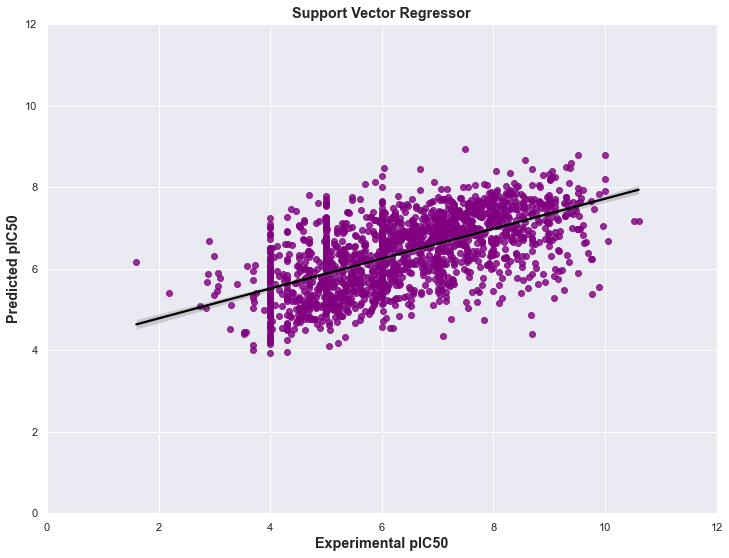

In [466]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)

ax = sns.regplot(Y_test, Y_pred, line_kws={'color': 'black'}, scatter_kws={'alpha':0.8, 'color':'purple'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(12, 9)
ax.set_title('Support Vector Regressor',fontsize='large', fontweight='bold')
plt.show()


# Principal Component Regressor

In [467]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression

# Initialize PCA and Linear Regression models
pca = PCA(n_components=10)  # choose the number of components to keep
lin_reg = LinearRegression()

# Fit PCA to training data
pca.fit(X_train)

# Transform training and test data using PCA
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Fit linear regression model on transformed data
lin_reg.fit(X_train_pca, Y_train)

# Predict on test data
Y_pred = lin_reg.predict(X_test_pca)

In [468]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
RMSE_pca = math.sqrt(mean_squared_error(Y_test, Y_pred))
MAE_pca = mean_absolute_error(Y_test, Y_pred)
print('RMSE for PCA Regressor =',RMSE)
print('MAE for PCA Regressor = ',MAE)

RMSE for PCA Regressor = 1.2434848679381485
MAE for PCA Regressor =  0.9180395410134604


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


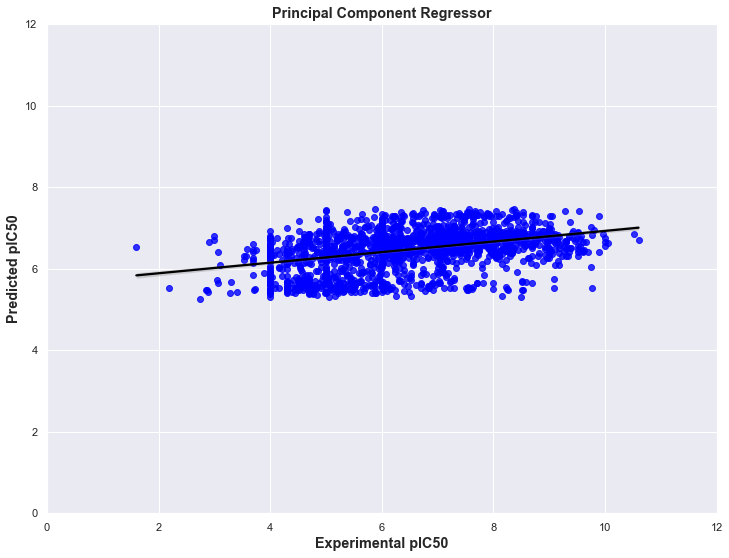

In [469]:
import seaborn as sns
import matplotlib.pyplot as plt


sns.set(color_codes=True)

ax = sns.regplot(Y_test, Y_pred, line_kws={'color': 'black'}, scatter_kws={'alpha':0.8, 'color':'blue'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(12, 9)
ax.set_title('Principal Component Regressor',fontsize='large', fontweight='bold')
plt.show()

# Random Forest Regressor

In [470]:
from sklearn.ensemble import RandomForestRegressor
RF_model = RandomForestRegressor(n_estimators=250, max_depth = 150, random_state=123 )
RF_model.fit(X_train, Y_train)

RandomForestRegressor(max_depth=150, n_estimators=250, random_state=123)

In [471]:
Y_pred = RF_model.predict(X_test)

In [472]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import math
RMSE_rf = math.sqrt(mean_squared_error(Y_test, Y_pred))
MAE_rf = mean_absolute_error(Y_test, Y_pred)
print('RMSE for Random Forest =',RMSE)
print('MAE for Random Forest = ',MAE)

RMSE for Random Forest = 1.2434848679381485
MAE for Random Forest =  0.9180395410134604


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


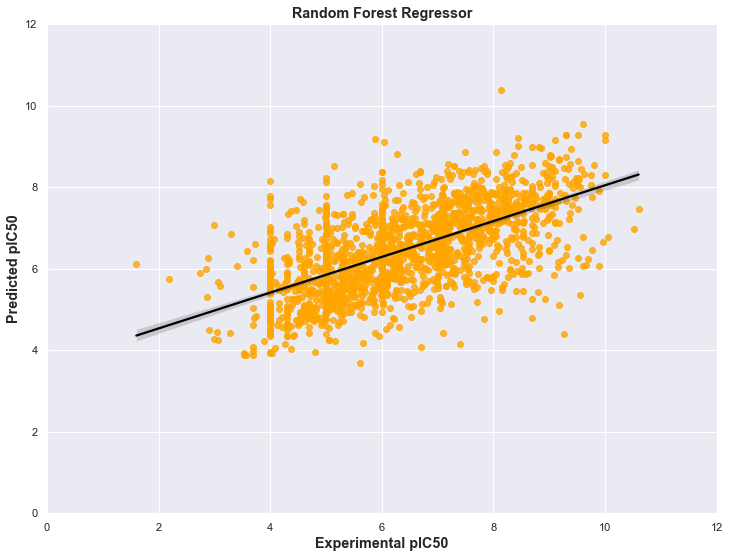

In [473]:
sns.set(color_codes=True)

ax = sns.regplot(Y_test, Y_pred, line_kws={'color': 'black'}, scatter_kws={'alpha':0.8, 'color':'orange'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(12, 9)
ax.set_title('Random Forest Regressor',fontsize='large', fontweight='bold')
plt.show()

# KNN Regressor

In [474]:
from sklearn.neighbors import KNeighborsRegressor

# Define the KNN model with k=5
knn = KNeighborsRegressor(n_neighbors=10)

# Train the model on the training data
knn.fit(X_train, Y_train)

# Predict the labels for the test data
Y_pred = knn.predict(X_test)

In [475]:
RMSE_knn = math.sqrt(mean_squared_error(Y_test, Y_pred))
MAE_knn = mean_absolute_error(Y_test, Y_pred)
print('RMSE for KNN =',RMSE)
print('MAE for KNN = ',MAE)

RMSE for KNN = 1.2434848679381485
MAE for KNN =  0.9180395410134604


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


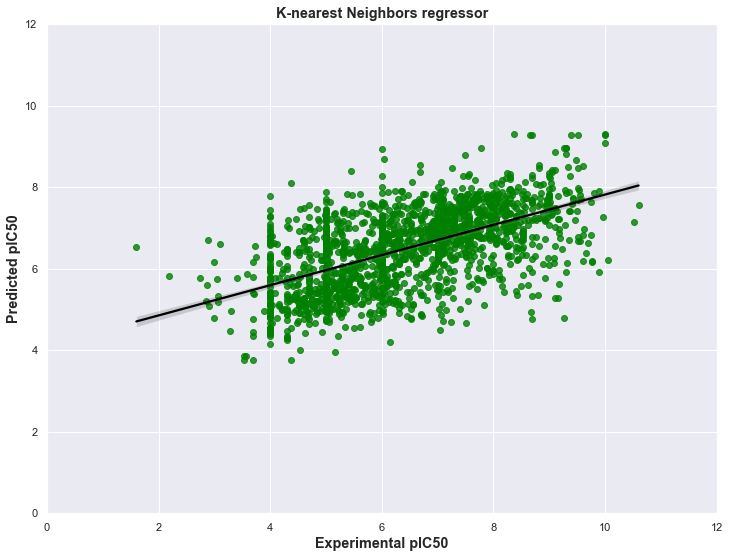

In [477]:
ax = sns.regplot(Y_test, Y_pred, line_kws={'color': 'black'}, scatter_kws={'alpha':0.8, 'color':'green'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(12, 9)
ax.set_title('K-nearest Neighbors regressor',fontsize='large', fontweight='bold')
plt.show()

# XG Boost Regressor

In [478]:
import xgboost as xgb

# Define the XGBoost regressor model
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 100)

# Train the model on the training data
xg_reg.fit(X_train,Y_train)

# Predict the labels for the test data
Y_pred = xg_reg.predict(X_test)

# Evaluate the model performance on the test data
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)

In [479]:
RMSE_xg = math.sqrt(mean_squared_error(Y_test, Y_pred))
MAE_xg = mean_absolute_error(Y_test, Y_pred)
print('RMSE for XGboost =',RMSE)
print('MAE for XGboost = ',MAE)

RMSE for XGboost = 1.2434848679381485
MAE for XGboost =  0.9180395410134604


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


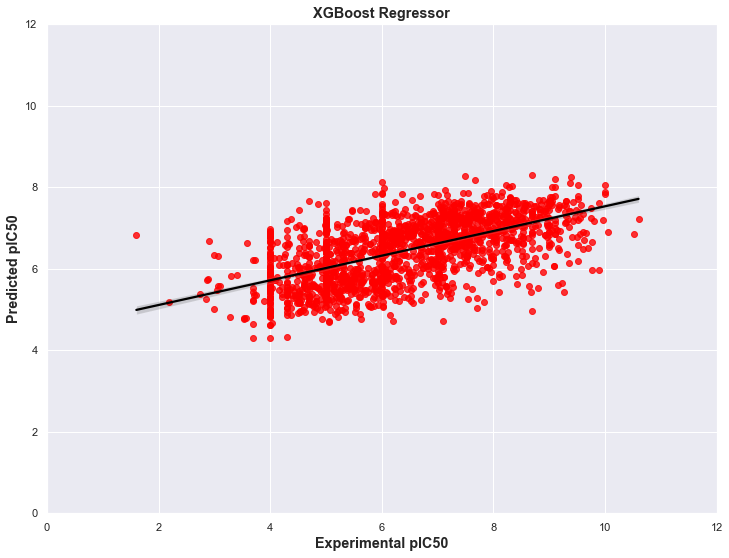

In [481]:
sns.set(color_codes=True)

ax = sns.regplot(Y_test, Y_pred, line_kws={'color': 'black'}, scatter_kws={'alpha':0.8, 'color':'red'})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(12, 9)
ax.set_title('XGBoost Regressor',fontsize='large', fontweight='bold')
plt.show()

In [516]:
from prettytable import PrettyTable

rmse_values = [RMSE_svr, RMSE_pca, RMSE_rf, RMSE_knn, RMSE_xg]
mae_values = [MAE_svr, MAE_pca, MAE_rf, MAE_knn, MAE_xg]
models = ['Support Vector Regressor', 'Principal Component Regressor', 'Random Forest Regressor', 
          'KNN Regressor', 'XGBoost Regressor']

table = PrettyTable()
table.field_names = ['Regressor Model Applied', 'RMSE Value', 'MAE Value']
table.align['Regressor Model'] = 'l'
table.align['RMSE'] = 'r'
table.align['MAE'] = 'r'

for i, model in enumerate(models):
    table.add_row([model, round(rmse_values[i], 3), round(mae_values[i], 3)])

print(table)

+-------------------------------+------------+-----------+
|    Regressor Model Applied    | RMSE Value | MAE Value |
+-------------------------------+------------+-----------+
|    Support Vector Regressor   |    1.19    |    0.9    |
| Principal Component Regressor |   1.384    |   1.133   |
|    Random Forest Regressor    |   1.184    |   0.877   |
|         KNN Regressor         |   1.225    |   0.933   |
|       XGBoost Regressor       |    1.21    |   0.954   |
+-------------------------------+------------+-----------+


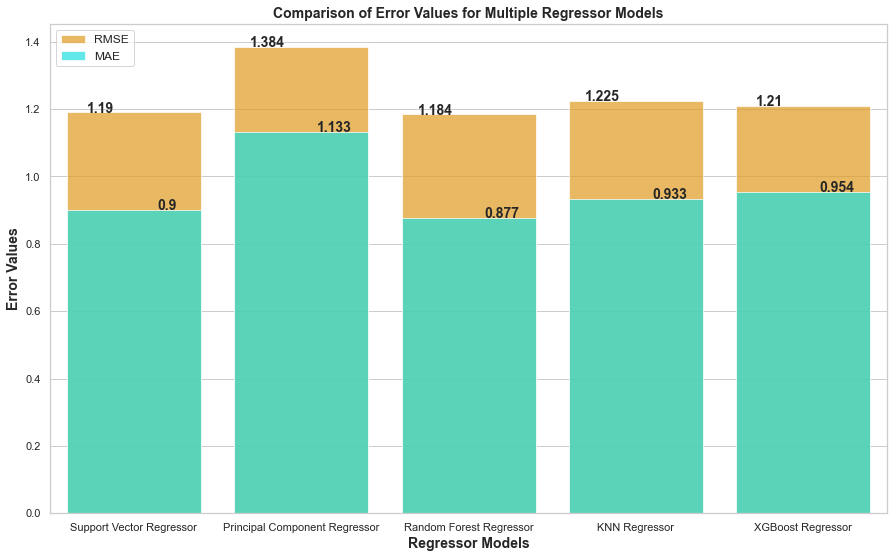

In [511]:
import seaborn as sns
import matplotlib.pyplot as plt

rmse_values = [RMSE_svr, RMSE_pca, RMSE_rf, RMSE_knn, RMSE_xg]
mae_values = [MAE_svr, MAE_pca, MAE_rf, MAE_knn, MAE_xg]
models = ['Support Vector Regressor', 'Principal Component Regressor', 'Random Forest Regressor', 
          'KNN Regressor', 'XGBoost Regressor']

sns.set_style("whitegrid")
plt.figure(figsize=(15,9))

# plot rmse_values
sns.barplot(x=models, y=rmse_values, color='orange', alpha=0.7, label='RMSE')

# plot mae_values
sns.barplot(x=models, y=mae_values,  color='cyan', alpha=0.7, label='MAE')

plt.xlabel('Regressor Models', size=14, weight='bold')
plt.ylabel('Error Values', size=14, weight='bold')
plt.title('Comparison of Error Values for Multiple Regressor Models', size=14, weight='bold')
plt.legend(loc='upper left', fontsize=12)

# Add the value of each RMSE and MAE to the plot
for i, (rmse, mae) in enumerate(zip(rmse_values, mae_values)):
    plt.text(i-0.2, rmse, str(round(rmse, 3)), ha="center", fontsize=14, weight='bold')
    plt.text(i+0.2, mae, str(round(mae, 3)), ha="center", fontsize=14, weight='bold')

plt.show()

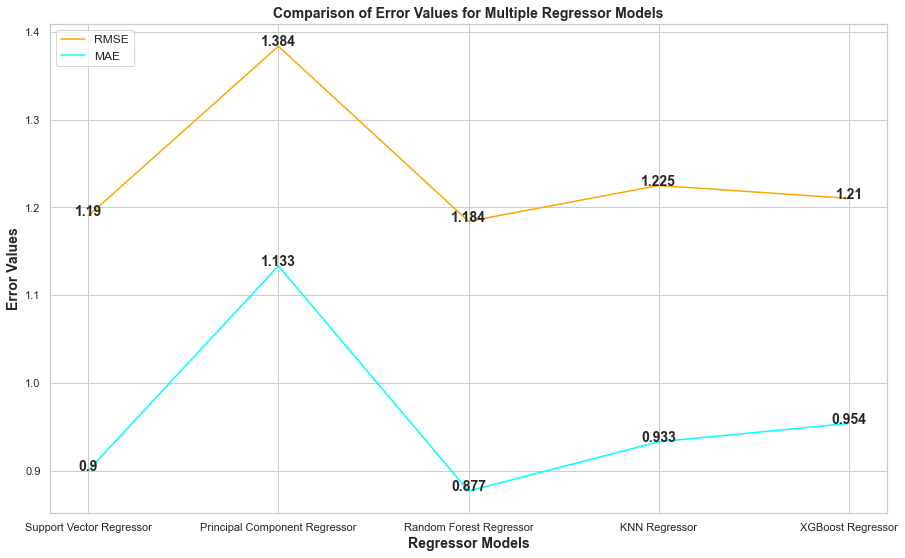

In [512]:
import seaborn as sns
import matplotlib.pyplot as plt

rmse_values = [RMSE_svr, RMSE_pca, RMSE_rf, RMSE_knn, RMSE_xg]
mae_values = [MAE_svr, MAE_pca, MAE_rf, MAE_knn, MAE_xg]
models = ['Support Vector Regressor', 'Principal Component Regressor', 'Random Forest Regressor', 
          'KNN Regressor', 'XGBoost Regressor']

sns.set_style("whitegrid")
plt.figure(figsize=(15,9))

# plot rmse_values as a line plot
sns.lineplot(x=models, y=rmse_values, color='orange', label='RMSE')

# plot mae_values as a line plot
sns.lineplot(x=models, y=mae_values,  color='cyan', label='MAE')

plt.xlabel('Regressor Models', size=14, weight='bold')
plt.ylabel('Error Values', size=14, weight='bold')
plt.title('Comparison of Error Values for Multiple Regressor Models', size=14, weight='bold')
plt.legend(loc='upper left', fontsize=12)

# Add the value of each RMSE and MAE to the plot
for i, (rmse, mae) in enumerate(zip(rmse_values, mae_values)):
    plt.text(i, rmse, str(round(rmse, 3)), ha="center", fontsize=14, weight='bold')
    plt.text(i, mae, str(round(mae, 3)), ha="center", fontsize=14, weight='bold')

plt.show()

In [515]:
! pip install PrettyTable

You should consider upgrading via the '/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
